In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
import matplotlib as mpl
#import mapclassify
import pyproj

In [8]:
!pip install mgwr


In [4]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from libpysal.examples import load_example
from sklearn.preprocessing import StandardScaler
import numpy as np

In [8]:
!pip install spreg


In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [132]:
#estaciones 
est = pd.read_csv(r"C:\Users\Documents\unal\analisis geoespacial\Estaciones_CalidadAire.csv", encoding='latin1')
est.head()

Codigo                                           Estacion  Longitud   
0       6  Politecnico Colombiano Jaime Isaza Cadavid - M... -75.57777  \
1      12                            Estación Tráfico Centro -75.56958   
2      28                   Itagüí - Casa de Justicia Itagüí -75.59721   
3      37                       Universidad San Buenaventura -75.56867   
4      38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   

   Latitud    Ciudad  
0  6.20897  Medellin  
1  6.25256  Medellin  
2  6.18567  Medellin  
3  6.33070     Bello  
4  6.16850    Itagüí

In [133]:

est['geometry'] = est.apply(
    lambda row: Point(row['Longitud'], row['Latitud']),  # Asegúrate de que los nombres de las columnas coincidan
    axis=1
)
estaciones = gpd.GeoDataFrame(est, geometry='geometry', crs="EPSG:4326")  # CRS para coordenadas geográficas (WGS84)
print(estaciones)

    Codigo                                           Estacion  Longitud   
0        6  Politecnico Colombiano Jaime Isaza Cadavid - M... -75.57777  \
1       12                            Estación Tráfico Centro -75.56958   
2       28                   Itagüí - Casa de Justicia Itagüí -75.59721   
3       37                       Universidad San Buenaventura -75.56867   
4       38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   
5       40                                Parque de las Aguas -75.41949   
6       41                            Universidad de Medellin -75.60996   
7       43                                  Tanque Miraflores -75.54919   
8       46                       Exito San Antonio - Medellin -75.56747   
9       69                   Caldas - E U Joaquín Aristizabal -75.63776   
10      78                             La Estrella - Hospital -75.64417   
11      79     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060   
12      80  Medellín, Vil

In [9]:
estaciones = estaciones.rename(columns={"Codigo": "Codigo_calidad"})

In [10]:
#datos de pm25
dpm25=pd.read_csv(r"C:\Users\Documents\unal\analisis geoespacial\datos pm25\dffinalpm25.csv")
print(dpm25)

     fecha_hora  Codigo_calidad       pm25  pp_diaria  temperatura  superado
0    2022-03-01              12  23.095238      1.524    21.068653         1
1    2022-03-01              90  16.620707      4.064    19.842549         1
2    2022-03-01              69  18.233983      1.016    18.282292         1
3    2022-03-01              94   5.529111      0.508    13.678354         0
4    2022-03-01              84  18.473157      1.778    19.714701         1
..          ...             ...        ...        ...          ...       ...
460  2022-03-31              87  16.540717      2.286    18.401757         1
461  2022-03-31              69  24.250258     11.684    17.666806         1
462  2022-03-31              38  24.083333      0.762    18.023326         1
463  2022-03-31              82  13.351865      2.286    19.426250         0
464  2022-03-31              94   7.542362      8.636    12.919854         0

[465 rows x 6 columns]


In [11]:
estpm25 = pd.merge(estaciones, dpm25, on="Codigo_calidad")
estpm25

Codigo_calidad                 Estacion  Longitud  Latitud    Ciudad   
0                12  Estación Tráfico Centro -75.56958  6.25256  Medellin  \
1                12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
2                12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
3                12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
4                12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
..              ...                      ...       ...      ...       ...   
460              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
461              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
462              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
463              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
464              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   

                      geometry  fecha_hora       pm25  pp_diaria  temperatura   
0    POINT (-75.56958 6.25256)  2022-03-01  23.095238      1.524    21.068653  \
1    POINT (-75.56958 6.25256)  2022-03-02  36.608696     11.684    19.719576   
2    POINT (-75.56958 6.25256)  2022-03-03  26.708333      0.000    21.488243   
3    POINT (-75.56958 6.25256)  2022-03-04  31.250000      7.620    20.839021   
4    POINT (-75.56958 6.25256)  2022-03-05  29.909091     22.098    19.510799   
..                         ...         ...        ...        ...          ...   
460  POINT (-75.49847 6.23636)  2022-03-27  11.419012     30.480    13.013090   
461  POINT (-75.49847 6.23636)  2022-03-28   9.310604      5.588    13.725132   
462  POINT (-75.49847 6.23636)  2022-03-29   9.186888      6.350    12.950444   
463  POINT (-75.49847 6.23636)  2022-03-30   9.721697      0.762    12.804520   
464  POINT (-75.49847 6.23636)  2022-03-31   7.542362      8.636    12.919854   

     superado  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
460         0  
461         0  
462         0  
463         0  
464         0  

[465 rows x 11 columns]

In [69]:
import seaborn as sns

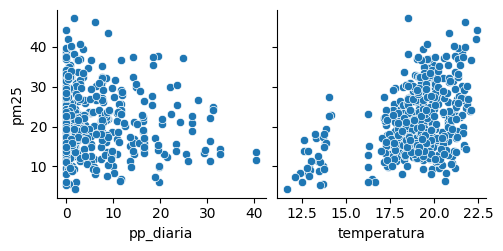

In [70]:
sns.pairplot(estpm25, x_vars=["pp_diaria", "temperatura"], y_vars=["pm25"], kind="scatter")
plt.show()

In [14]:
estpm25.columns

Index(['Codigo_calidad', 'Estacion', 'Longitud', 'Latitud', 'Ciudad',
       'geometry', 'fecha_hora', 'pm25', 'pp_diaria', 'temperatura',
       'superado'],
      dtype='object')

In [59]:
coords_unicas = estpm25.groupby('Estacion')[['Latitud', 'Longitud']].first().values 

**Se miro la distribución de los datos diarios, esto se hizo debido a que se realizará un análisis diario y horario de los datos , para poder comparar dichos datos con los datos de raster que se procesarán**
Para los datos diarios se observo que presenta una distribución lognormal y además se realizó el el ols y mgwr 
También se calculó el moran de manera que pudiera observar cuales son las estaciones que en el mes mantienen con las concentraciones más altas de material particulado, las que tienen concentraciones más bajas 

In [60]:
#moran
import libpysal as ps
k = 3  # Número de vecinos 
w_knn = ps.weights.KNN.from_array(coords_unicas, k=3)

In [61]:
print("Número de conexiones:", w_knn.n)

Número de conexiones: 15


In [62]:
pm25_promedio = estpm25.groupby('Estacion').agg({'pm25':'mean'}).reset_index()
pm25_promedio

Estacion       pm25
0                              Barbosa - Torre Social  16.172026
1                         Bello - I.E. Fernando Vélez  18.611428
2                    Caldas - E U Joaquín Aristizabal  20.328367
3            Copacabana - Ciudadela Educativa La Vida  18.703870
4                   Envigado - E.S.E. Santa Gertrudis  20.007952
5                             Estación Tráfico Centro  31.451636
6           Itagüí - I.E. Concejo Municipal de Itagüí  19.828446
7                              La Estrella - Hospital  21.028296
8            Medellin, Belén - I.E Pedro Justo Berrio  26.117569
9                              Medellín - Santa Elena  12.692992
10     Medellín, Altavista - I.E. Pedro Octavio Amado  22.918315
11  Medellín, El Poblado - I.E INEM sede Santa Cat...  21.080783
12  Medellín, San Cristobal - Parque Biblioteca Fe...  19.597143
13  Medellín, Villahermosa - Planta de producción ...  22.210490
14                    Sabaneta - I.E. Rafael J. Mejía  22.207962

In [19]:
pm25_promedio.describe()

pm25
count  15.000000
mean   20.863818
std     4.224323
min    12.692992
25%    19.150506
50%    20.328367
75%    22.209226
max    31.451636

In [64]:
gdf = gpd.GeoDataFrame(estpm25, geometry='geometry', crs="EPSG:4326") 

In [63]:
from esda.moran import Moran
moran_pm25 = Moran(pm25_promedio["pm25"], w_knn, permutations=9999)
print(f"I de Moran: {moran_pm25.I}, p-value: {moran_pm25.p_sim}")


I de Moran: 0.15849047083049142, p-value: 0.0673


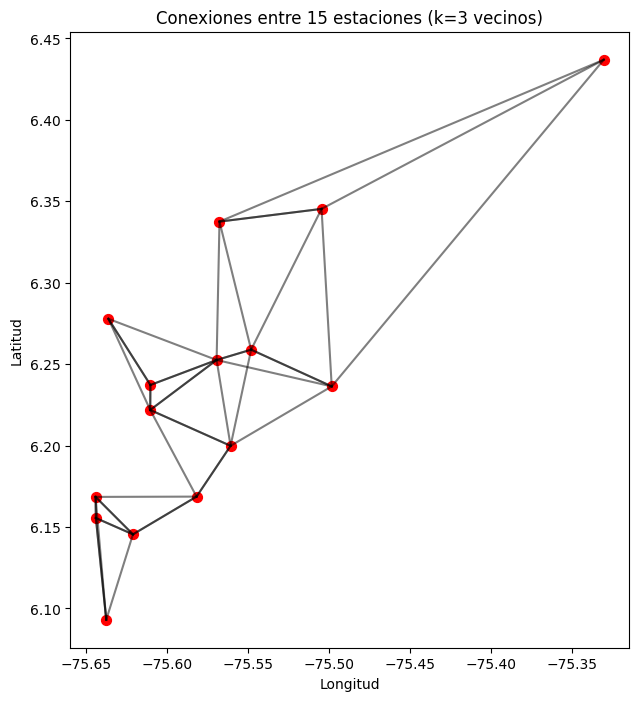

In [65]:
import matplotlib.pyplot as plt

# GeoDataFrame con las ubicaciones únicas
gdf_estaciones = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(coords_unicas[:, 1], coords_unicas[:, 0]),  # Lon, Lat
    crs="EPSG:4326"
)

# Grafica
fig, ax = plt.subplots(figsize=(10, 8))
gdf_estaciones.plot(ax=ax, color='red', markersize=50)

# conexiones
for i, neighbors in w_knn.neighbors.items():
    for j in neighbors:
        ax.plot(
            [coords_unicas[i, 1], coords_unicas[j, 1]],  # Lon
            [coords_unicas[i, 0], coords_unicas[j, 0]],  # Lat
            'k-', alpha=0.5
        )

ax.set_title("Conexiones entre 15 estaciones (k=3 vecinos)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

Tamaño de y_std: (15,)
Tamaño de spatial_lag_std: (15,)


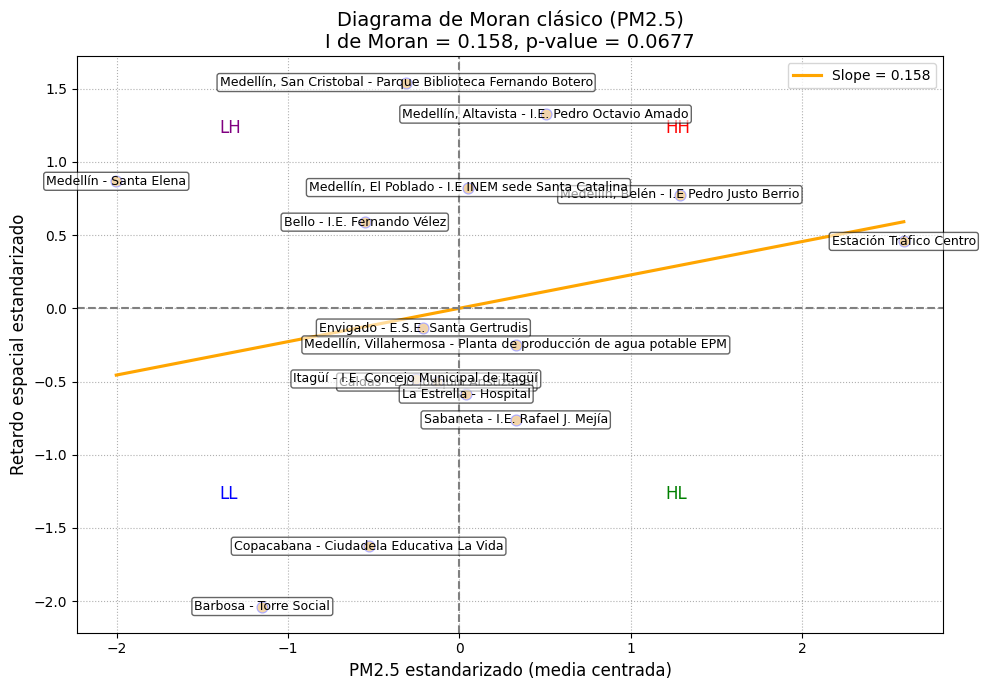

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from esda.moran import Moran

# Datos
y = pm25_promedio["pm25"].values
w = w_knn  

# Cálculo de Moran
moran_pm25 = Moran(y, w, permutations=9999)

# Estandarización
y_std = (y - y.mean()) / y.std()
spatial_lag = w.sparse @ y
spatial_lag_std = (spatial_lag - spatial_lag.mean()) / spatial_lag.std()

# Verificación
print("Tamaño de y_std:", y_std.shape)
print("Tamaño de spatial_lag_std:", spatial_lag_std.shape)

# Gráfico
plt.figure(figsize=(10, 7))
plt.scatter(y_std, spatial_lag_std, s=60, alpha=0.7, color='blue')

# Línea de regresión
sns.regplot(x=y_std, y=spatial_lag_std, ci=None, color='orange',
            line_kws={'label': f'Slope = {moran_pm25.I:.3f}'})

# Referencias
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Cuadrantes
plt.text(1.2, 1.2, 'HH', fontsize=12, color='red')
plt.text(-1.4, -1.3, 'LL', fontsize=12, color='blue')
plt.text(1.2, -1.3, 'HL', fontsize=12, color='green')
plt.text(-1.4, 1.2, 'LH', fontsize=12, color='purple')

# Etiquetas de estaciones
for i, (x, y_) in enumerate(zip(y_std, spatial_lag_std)):
    plt.text(x, y_, pm25_promedio['Estacion'].iloc[i], fontsize=9,
             ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2'))

# Título y ejes
plt.title(f"Diagrama de Moran clásico (PM2.5)\nI de Moran = {moran_pm25.I:.3f}, p-value = {moran_pm25.p_sim:.4f}", fontsize=14)
plt.xlabel("PM2.5 estandarizado (media centrada)", fontsize=12)
plt.ylabel("Retardo espacial estandarizado", fontsize=12)

plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


En este gráfico se puede observar que las zonas con mayor cantidad de material particulado se encuentran en medellín y están rodeadas de otras con altos niveles de contaminación y las estaciones con menores contaminaciones se suelen encontrar en zonas rurales.

In [66]:
from libpysal.weights import lag_spatial
# Valor de referencia fijo ( 15 µg/m³)
referencia = 15

# Centrar PM2.5 en 15 en lugar de la media
y = pm25_promedio["pm25"]
y_std = (y - referencia) / y.std()

# Calcular lag espacial con matriz de pesos
w_knn.transform = 'r'
spatial_lag_std = lag_spatial(w_knn, y_std)

# Calcular Moran's I 
from esda.moran import Moran
moran_pm25 = Moran(y, w_knn, permutations=9999)


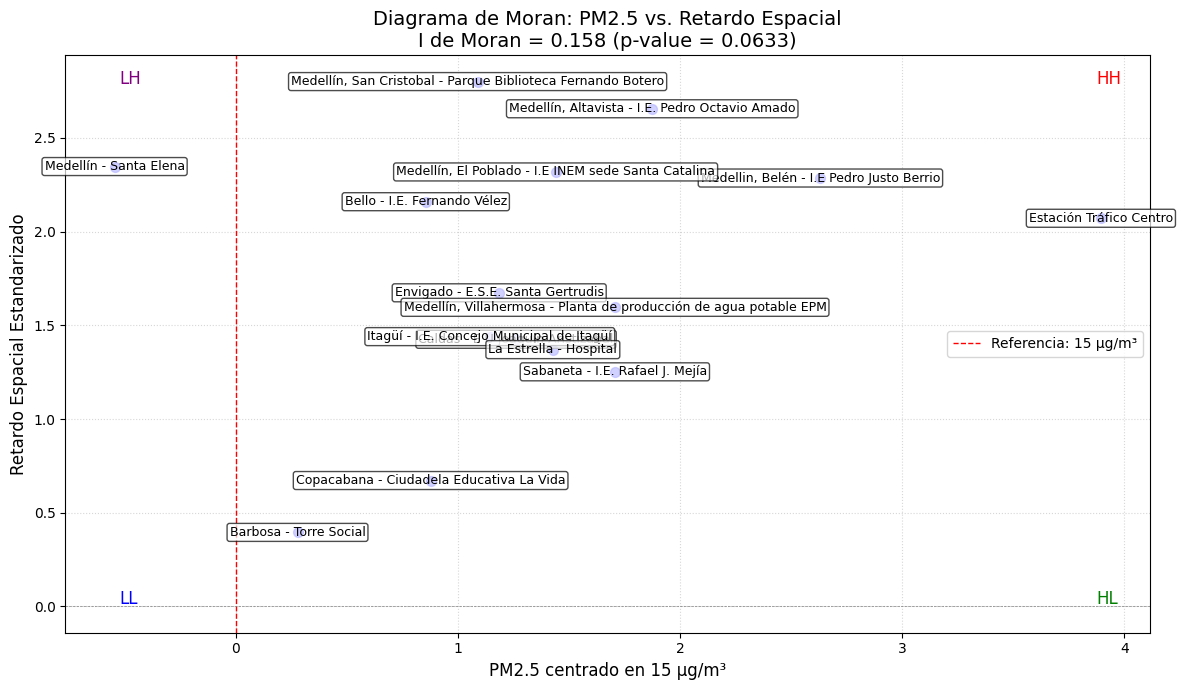

In [67]:
plt.figure(figsize=(12, 7))

scatter = plt.scatter(y_std, spatial_lag_std, c='blue', s=50, alpha=0.6)

# Líneas de referencia centradas en la "media artificial" (referencia = 15)
plt.axvline(0, color='red', linestyle='--', linewidth=1, label=f'Referencia: {referencia} µg/m³')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

plt.title(
    f"Diagrama de Moran: PM2.5 vs. Retardo Espacial\n"
    f"I de Moran = {moran_pm25.I:.3f} (p-value = {moran_pm25.p_sim:.4f})", 
    fontsize=14
)

plt.xlabel(f"PM2.5 centrado en {referencia} µg/m³", fontsize=12)
plt.ylabel("Retardo Espacial Estandarizado", fontsize=12)

# Etiquetas de estaciones
for i, (x, y) in enumerate(zip(y_std, spatial_lag_std)):
    plt.text(
        x, y, 
        pm25_promedio['Estacion'].iloc[i], 
        fontsize=9, 
        ha='center', 
        va='center',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2')
    )

# Cuadrantes
plt.text(0.95, 0.95, 'HH', transform=plt.gca().transAxes, fontsize=12, color='red')
plt.text(0.05, 0.05, 'LL', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.95, 0.05, 'HL', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.05, 0.95, 'LH', transform=plt.gca().transAxes, fontsize=12, color='purple')

plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


Este gráfico es ilustrativo , quiere decir que en los promedios realizados en las estaciones todas las estaciones tienden a estar encima del máximo permisible excepto la de Santa Elena.

In [35]:
def analizar_distribuciones(df, variable, nombre_visible=None):
    if nombre_visible is None:
        nombre_visible = variable
        
    data = df[variable].dropna()
    
    results = {}
    
    distributions = {
        'normal': stats.norm,
        'lognormal': stats.lognorm,
        'exponencial': stats.expon,
        'gamma': stats.gamma,
        'gumbel_r': stats.gumbel_r,
        'frechet_r': stats.genextreme
    }

    for name, dist in distributions.items():
        try:
            if name == 'lognormal':
                params = dist.fit(data, floc=0)
            else:
                params = dist.fit(data)
                
            D, p_value = stats.kstest(data, dist.name, args=params)
            results[name] = {
                'params': params,
                'D': D,
                'p_value': p_value
            }
        except Exception as e:
            print(f"Error con {name}: {e}")
    
    print(f"\nResultados del test K-S para '{nombre_visible}':")
    for name, res in sorted(results.items(), key=lambda x: x[1]['p_value'], reverse=True):
        print(f"{name.title():<12} | D = {res['D']:.4f} | p = {res['p_value']:.4f}")

    x = np.linspace(data.min(), data.max(), 1000)
    sns.histplot(data, kde=False, stat='density', bins=30, color='gray', alpha=0.5, label='Datos reales')

    for name, res in results.items():
        dist = distributions[name]
        y = dist.pdf(x, *res['params'])
        plt.plot(x, y, label=name)

    plt.title(f"Comparación de distribuciones para {nombre_visible}")
    plt.xlabel(nombre_visible)
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)
    plt.show()


In [36]:
from scipy import stats



Resultados del test K-S para 'Temperatura':
Frechet_R    | D = 0.0953 | p = 0.0004
Normal       | D = 0.1289 | p = 0.0000
Gamma        | D = 0.1499 | p = 0.0000
Lognormal    | D = 0.1606 | p = 0.0000
Gumbel_R     | D = 0.1983 | p = 0.0000
Exponencial  | D = 0.4397 | p = 0.0000


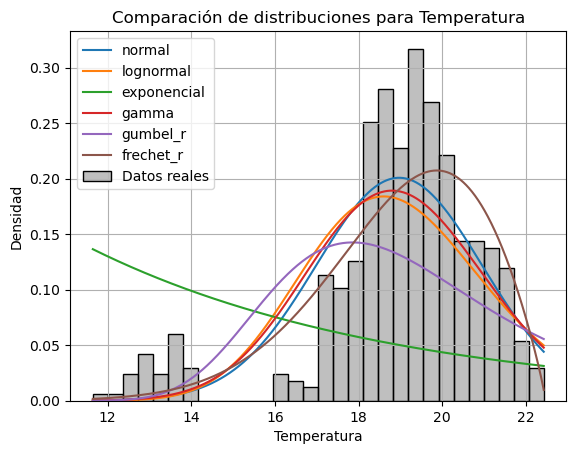

In [37]:
analizar_distribuciones(estpm25, 'temperatura', nombre_visible='Temperatura')



Resultados del test K-S para 'PM2.5':
Gumbel_R     | D = 0.0397 | p = 0.4449
Lognormal    | D = 0.0400 | p = 0.4350
Gamma        | D = 0.0458 | p = 0.2740
Frechet_R    | D = 0.0504 | p = 0.1820
Normal       | D = 0.0880 | p = 0.0014
Exponencial  | D = 0.2650 | p = 0.0000


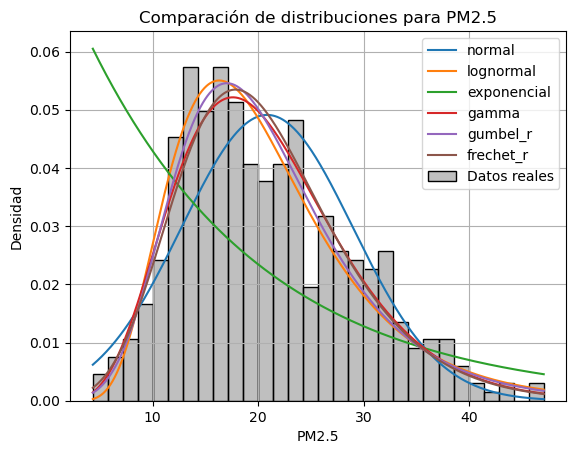

In [38]:
analizar_distribuciones(estpm25, 'pm25', nombre_visible='PM2.5')

In [37]:
p_cero = np.mean(estpm25['pp_diaria'] == 0)  
print(f"Probabilidad de día seco (p): {p_cero:.2f}")

Probabilidad de día seco (p): 0.30


Parámetros Lognormal (s, loc, scale): (1.306329721312171, 0.0, 4.119022583803225)


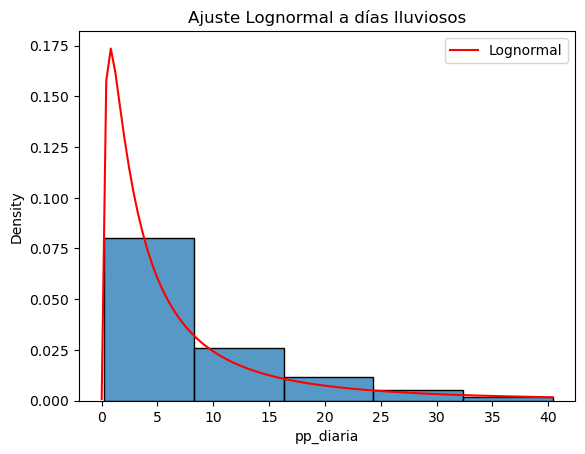

In [38]:
precip_positiva = estpm25[estpm25['pp_diaria'] > 0]['pp_diaria']

# Ajustar distribución Lognormal a los datos > 0
params_lognorm = stats.lognorm.fit(precip_positiva, floc=0)  # floc=0 para forzar loc=0
print(f"Parámetros Lognormal (s, loc, scale): {params_lognorm}")

# Graficar histograma + densidad ajustada
sns.histplot(precip_positiva, stat='density', bins=5, kde=False)
x = np.linspace(0.01, max(precip_positiva), 100)
plt.plot(x, stats.lognorm.pdf(x, *params_lognorm), 'r-', label='Lognormal')
plt.legend()
plt.title('Ajuste Lognormal a días lluviosos')
plt.show()

In [40]:
def delta_lognormal_pdf(x, p, s, scale):
    """Función de densidad (PDF) para el modelo Delta-Lognormal"""
    if isinstance(x, (float, int)):
        return p if x == 0 else (1 - p) * stats.lognorm.pdf(x, s, 0, scale)
    else:  # Para arrays o Series
        return np.where(x == 0, p, (1 - p) * stats.lognorm.pdf(x, s, 0, scale))

In [42]:
prob_mayor_0mm = (1 - p_cero) * (1 - stats.lognorm.cdf(2, *params_lognorm))
print(f"P(X > 0 mm): {prob_mayor_0mm:.2f}")

P(X > 0 mm): 0.50


In [24]:
estpm25['logpm25'] = np.log1p(estpm25['pm25'])

In [25]:
estpm25

Codigo_calidad                 Estacion  Longitud  Latitud    Ciudad   
0                12  Estación Tráfico Centro -75.56958  6.25256  Medellin  \
1                12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
2                12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
3                12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
4                12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
..              ...                      ...       ...      ...       ...   
460              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
461              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
462              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
463              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
464              94   Medellín - Santa Elena -75.49847  6.23636  Medellín   

                      geometry  fecha_hora       pm25  pp_diaria  temperatura   
0    POINT (-75.56958 6.25256)  2022-03-01  23.095238      1.524    21.068653  \
1    POINT (-75.56958 6.25256)  2022-03-02  36.608696     11.684    19.719576   
2    POINT (-75.56958 6.25256)  2022-03-03  26.708333      0.000    21.488243   
3    POINT (-75.56958 6.25256)  2022-03-04  31.250000      7.620    20.839021   
4    POINT (-75.56958 6.25256)  2022-03-05  29.909091     22.098    19.510799   
..                         ...         ...        ...        ...          ...   
460  POINT (-75.49847 6.23636)  2022-03-27  11.419012     30.480    13.013090   
461  POINT (-75.49847 6.23636)  2022-03-28   9.310604      5.588    13.725132   
462  POINT (-75.49847 6.23636)  2022-03-29   9.186888      6.350    12.950444   
463  POINT (-75.49847 6.23636)  2022-03-30   9.721697      0.762    12.804520   
464  POINT (-75.49847 6.23636)  2022-03-31   7.542362      8.636    12.919854   

     superado   logpm25  
0           1  3.182014  
1           1  3.627235  
2           1  3.321733  
3           1  3.473518  
4           1  3.431050  
..        ...       ...  
460         0  2.519229  
461         0  2.333173  
462         0  2.321101  
463         0  2.372269  
464         0  2.145038  

[465 rows x 12 columns]

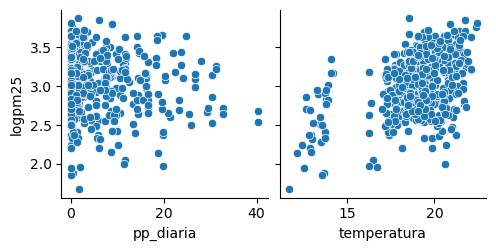

In [26]:
import seaborn as sns
sns.pairplot(estpm25, x_vars=["pp_diaria", "temperatura"], y_vars=["logpm25"], kind="scatter")
plt.show()

In [44]:
df_agg=pd.read_excel(r"C:\Users\Documents\unal\analisis geoespacial\datos\df_gg.xlsx")
df_agg

Unnamed: 0                                           Estacion       pm25   
0            0                             Barbosa - Torre Social  16.172026  \
1            1                        Bello - I.E. Fernando Vélez  18.611428   
2            2                   Caldas - E U Joaquín Aristizabal  20.328367   
3            3           Copacabana - Ciudadela Educativa La Vida  18.703870   
4            4                  Envigado - E.S.E. Santa Gertrudis  20.007952   
5            5                            Estación Tráfico Centro  31.451636   
6            6          Itagüí - I.E. Concejo Municipal de Itagüí  19.828446   
7            7                             La Estrella - Hospital  21.028296   
8            8           Medellin, Belén - I.E Pedro Justo Berrio  26.117569   
9            9                             Medellín - Santa Elena  12.692992   
10          10     Medellín, Altavista - I.E. Pedro Octavio Amado  22.918315   
11          11  Medellín, El Poblado - I.E INEM sede Santa Cat...  21.080783   
12          12  Medellín, San Cristobal - Parque Biblioteca Fe...  19.597143   
13          13  Medellín, Villahermosa - Planta de producción ...  22.210490   
14          14                    Sabaneta - I.E. Rafael J. Mejía  22.207962   

    pp_diaria  temperatura  Latitud  Longitud   logpm25  
0    3.605161    20.525628  6.43696 -75.33040  2.783283  
1    4.129548    19.154723  6.33755 -75.56780  2.923776  
2    4.506452    18.172507  6.09308 -75.63776  3.012017  
3    4.129548    20.542402  6.34536 -75.50475  2.928730  
4    5.260258    20.380514  6.16868 -75.58197  2.996130  
5    6.563032    20.995060  6.25256 -75.56958  3.448451  
6    7.357806    18.851382  6.16850 -75.64436  2.987118  
7    9.078452    19.306679  6.15553 -75.64417  3.045869  
8    4.973484    18.564340  6.23723 -75.61047  3.262608  
9    5.350387    13.277141  6.23636 -75.49847  2.541050  
10   4.973484    18.564340  6.22189 -75.61060  3.131936  
11   3.793613    19.460224  6.19987 -75.56095  3.048362  
12   5.522452    18.564340  6.27785 -75.63643  2.975384  
13   5.350387    18.464215  6.25891 -75.54826  3.100565  
14   9.078452    19.707644  6.14550 -75.62126  3.100451

In [45]:
resultado = pd.merge(
    df_agg,          # DataFrame con variables
    est,                   # DataFrame con códigos y localización
    on="Estacion",         # Columna en común
    how="left"             # Mantener todas las filas del primer DataFrame (df_variables)
)

In [46]:
resultado

Unnamed: 0                                           Estacion       pm25   
0            0                             Barbosa - Torre Social  16.172026  \
1            1                        Bello - I.E. Fernando Vélez  18.611428   
2            2                   Caldas - E U Joaquín Aristizabal  20.328367   
3            3           Copacabana - Ciudadela Educativa La Vida  18.703870   
4            4                  Envigado - E.S.E. Santa Gertrudis  20.007952   
5            5                            Estación Tráfico Centro  31.451636   
6            6          Itagüí - I.E. Concejo Municipal de Itagüí  19.828446   
7            7                             La Estrella - Hospital  21.028296   
8            8           Medellin, Belén - I.E Pedro Justo Berrio  26.117569   
9            9                             Medellín - Santa Elena  12.692992   
10          10     Medellín, Altavista - I.E. Pedro Octavio Amado  22.918315   
11          11  Medellín, El Poblado - I.E INEM sede Santa Cat...  21.080783   
12          12  Medellín, San Cristobal - Parque Biblioteca Fe...  19.597143   
13          13  Medellín, Villahermosa - Planta de producción ...  22.210490   
14          14                    Sabaneta - I.E. Rafael J. Mejía  22.207962   

    pp_diaria  temperatura  Latitud_x  Longitud_x   logpm25  Codigo   
0    3.605161    20.525628    6.43696   -75.33040  2.783283      81  \
1    4.129548    19.154723    6.33755   -75.56780  2.923776      87   
2    4.506452    18.172507    6.09308   -75.63776  3.012017      69   
3    4.129548    20.542402    6.34536   -75.50475  2.928730      82   
4    5.260258    20.380514    6.16868   -75.58197  2.996130      88   
5    6.563032    20.995060    6.25256   -75.56958  3.448451      12   
6    7.357806    18.851382    6.16850   -75.64436  2.987118      38   
7    9.078452    19.306679    6.15553   -75.64417  3.045869      78   
8    4.973484    18.564340    6.23723   -75.61047  3.262608      83   
9    5.350387    13.277141    6.23636   -75.49847  2.541050      94   
10   4.973484    18.564340    6.22189   -75.61060  3.131936      79   
11   3.793613    19.460224    6.19987   -75.56095  3.048362      84   
12   5.522452    18.564340    6.27785   -75.63643  2.975384      85   
13   5.350387    18.464215    6.25891   -75.54826  3.100565      80   
14   9.078452    19.707644    6.14550   -75.62126  3.100451      90   

    Longitud_y  Latitud_y       Ciudad                   geometry  
0    -75.33040    6.43696      Barbosa   POINT (-75.3304 6.43696)  
1    -75.56780    6.33755        Bello   POINT (-75.5678 6.33755)  
2    -75.63776    6.09308       Caldas  POINT (-75.63776 6.09308)  
3    -75.50475    6.34536   Copacabana  POINT (-75.50475 6.34536)  
4    -75.58197    6.16868     Envigado  POINT (-75.58197 6.16868)  
5    -75.56958    6.25256     Medellin  POINT (-75.56958 6.25256)  
6    -75.64436    6.16850       Itagüí   POINT (-75.64436 6.1685)  
7    -75.64417    6.15553  La Estrella  POINT (-75.64417 6.15553)  
8    -75.61047    6.23723     Medellin  POINT (-75.61047 6.23723)  
9    -75.49847    6.23636     Medellín  POINT (-75.49847 6.23636)  
10   -75.61060    6.22189     Medellin   POINT (-75.6106 6.22189)  
11   -75.56095    6.19987     Medellin  POINT (-75.56095 6.19987)  
12   -75.63643    6.27785     Medellin  POINT (-75.63643 6.27785)  
13   -75.54826    6.25891     Medellin  POINT (-75.54826 6.25891)  
14   -75.62126    6.14550     Sabaneta   POINT (-75.62126 6.1455)

In [41]:
resultado.columns

Index(['Unnamed: 0', 'Estacion', 'pm25', 'pp_diaria', 'temperatura',
       'Latitud_x', 'Longitud_x', 'logpm25', 'Codigo', 'Longitud_y',
       'Latitud_y', 'Ciudad', 'geometry'],
      dtype='object')

In [47]:
resultado = resultado.drop(['Estacion','Latitud_x', 'Longitud_x', 'pm25','Longitud_y',
       'Latitud_y', 'Ciudad', 'geometry','Unnamed: 0'], axis=1)

In [48]:
resultado

pp_diaria  temperatura   logpm25  Codigo
0    3.605161    20.525628  2.783283      81
1    4.129548    19.154723  2.923776      87
2    4.506452    18.172507  3.012017      69
3    4.129548    20.542402  2.928730      82
4    5.260258    20.380514  2.996130      88
5    6.563032    20.995060  3.448451      12
6    7.357806    18.851382  2.987118      38
7    9.078452    19.306679  3.045869      78
8    4.973484    18.564340  3.262608      83
9    5.350387    13.277141  2.541050      94
10   4.973484    18.564340  3.131936      79
11   3.793613    19.460224  3.048362      84
12   5.522452    18.564340  2.975384      85
13   5.350387    18.464215  3.100565      80
14   9.078452    19.707644  3.100451      90


Resultados del test K-S para 'pm25':
Gamma        | D = 0.1696 | p = 0.7204
Normal       | D = 0.1740 | p = 0.6916
Frechet_R    | D = 0.1749 | p = 0.6858
Lognormal    | D = 0.1801 | p = 0.6512
Gumbel_R     | D = 0.2040 | p = 0.4971
Exponencial  | D = 0.3820 | p = 0.0177


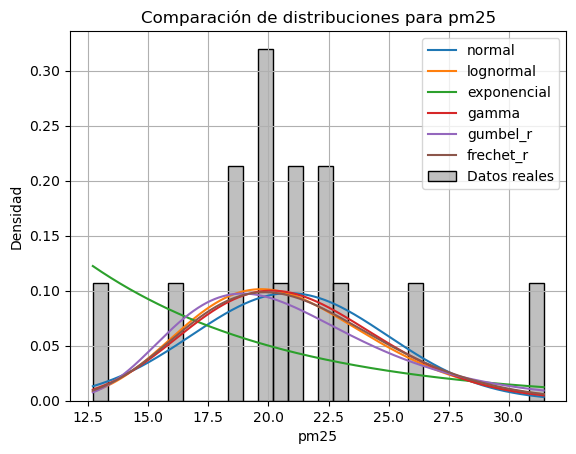

In [40]:
analizar_distribuciones(df_agg, 'pm25', nombre_visible='pm25')

In [52]:

log_pm25 = np.log(df_agg["pm25"] + 0.1)


shape_log, _, scale_log = gamma.fit(log_pm25, floc=0)


percentiles = gamma.cdf(log_pm25, shape_log, loc=0, scale=scale_log)
pm25_ajustado = gamma.ppf(percentiles, shape_log, loc=0, scale=scale_log)


df_agg["pm25_ajustado"] = np.exp(pm25_ajustado)

In [53]:
df_agg

Unnamed: 0                                           Estacion       pm25   
0            0                             Barbosa - Torre Social  16.172026  \
1            1                        Bello - I.E. Fernando Vélez  18.611428   
2            2                   Caldas - E U Joaquín Aristizabal  20.328367   
3            3           Copacabana - Ciudadela Educativa La Vida  18.703870   
4            4                  Envigado - E.S.E. Santa Gertrudis  20.007952   
5            5                            Estación Tráfico Centro  31.451636   
6            6          Itagüí - I.E. Concejo Municipal de Itagüí  19.828446   
7            7                             La Estrella - Hospital  21.028296   
8            8           Medellin, Belén - I.E Pedro Justo Berrio  26.117569   
9            9                             Medellín - Santa Elena  12.692992   
10          10     Medellín, Altavista - I.E. Pedro Octavio Amado  22.918315   
11          11  Medellín, El Poblado - I.E INEM sede Santa Cat...  21.080783   
12          12  Medellín, San Cristobal - Parque Biblioteca Fe...  19.597143   
13          13  Medellín, Villahermosa - Planta de producción ...  22.210490   
14          14                    Sabaneta - I.E. Rafael J. Mejía  22.207962   

    pp_diaria  temperatura  Latitud  Longitud   logpm25  pm25_ajustado  
0    3.605161    20.525628  6.43696 -75.33040  2.783283      16.272026  
1    4.129548    19.154723  6.33755 -75.56780  2.923776      18.711428  
2    4.506452    18.172507  6.09308 -75.63776  3.012017      20.428367  
3    4.129548    20.542402  6.34536 -75.50475  2.928730      18.803870  
4    5.260258    20.380514  6.16868 -75.58197  2.996130      20.107952  
5    6.563032    20.995060  6.25256 -75.56958  3.448451      31.551636  
6    7.357806    18.851382  6.16850 -75.64436  2.987118      19.928446  
7    9.078452    19.306679  6.15553 -75.64417  3.045869      21.128296  
8    4.973484    18.564340  6.23723 -75.61047  3.262608      26.217569  
9    5.350387    13.277141  6.23636 -75.49847  2.541050      12.792992  
10   4.973484    18.564340  6.22189 -75.61060  3.131936      23.018315  
11   3.793613    19.460224  6.19987 -75.56095  3.048362      21.180783  
12   5.522452    18.564340  6.27785 -75.63643  2.975384      19.697143  
13   5.350387    18.464215  6.25891 -75.54826  3.100565      22.310490  
14   9.078452    19.707644  6.14550 -75.62126  3.100451      22.307962

In [28]:
# por días ols
X = df_agg[['pp_diaria', 'temperatura',]]  
X = sm.add_constant(X)                   
y = df_agg['logpm25']                           

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                logpm25   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     3.907
Date:                Tue, 24 Jun 2025   Prob (F-statistic):             0.0493
Time:                        20:51:09   Log-Likelihood:                 6.9235
No. Observations:                  15   AIC:                            -7.847
Df Residuals:                      12   BIC:                            -5.723
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6459      0.498      3.304      

In [70]:
residuos = modelo.resid.values

In [71]:
moran_resid = Moran(residuos, w_knn)
print(f"Moran I = {moran_resid.I:.4f}, p-value = {moran_resid.p_sim:.4f}")

Moran I = 0.3035, p-value = 0.0230


Este modelo me muestra que el modelo no es adecuado por lo cual se utiliza SAR y SEM

In [57]:
from scipy.stats import shapiro
_, p_valor = shapiro(modelo.resid)
print(f"Normalidad de residuos (p > 0.05): {p_valor > 0.05}")

Normalidad de residuos (p > 0.05): True


** Haciendo el modelo MGWR para datos horarios de las estaciones**

**ahora quiero analizar como cambia material particulado por día**
en este modelo estoy analizando como cambia el material particulado diariamente dependiendo de la temperatura o precipitación

In [4]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\SKop981040\Documents\unal\analisis geoespacial\myenv\Scripts\python.exe -m pip install --upgrade pip


In [28]:
esthorario1= pd. read_csv(r"C:\Users\Documents\unal\analisis geoespacial\Trabajo3\horastodos.csv")
esthorario1

Unnamed: 0  Codigo  hora       pm25  pp_horaria  temperatura
0             0      12     1  28.026581    0.294968    19.163871
1             1      12     2  27.870992    0.540774    18.928801
2             2      12     3  27.077382    1.122516    18.679000
3             3      12     4  26.379148    0.409677    18.487376
4             4      12     5  26.380198    0.270387    18.398113
..          ...     ...   ...        ...         ...          ...
355         355      94    20  11.010333    0.098323    12.894070
356         356      94    21  12.649717    0.409677    12.673548
357         357      94    22  12.676909    0.122903    12.506495
358         358      94    23  11.904949    0.155677    12.283457
359         359      94    24  10.743358    0.876710    12.044747

[360 rows x 6 columns]

In [29]:
esthorario=pd.merge(esthorario1,est,on="Codigo",how="inner")
esthorario

Unnamed: 0  Codigo  hora       pm25  pp_horaria  temperatura   
0             0      12     1  28.026581    0.294968    19.163871  \
1             1      12     2  27.870992    0.540774    18.928801   
2             2      12     3  27.077382    1.122516    18.679000   
3             3      12     4  26.379148    0.409677    18.487376   
4             4      12     5  26.380198    0.270387    18.398113   
..          ...     ...   ...        ...         ...          ...   
355         355      94    20  11.010333    0.098323    12.894070   
356         356      94    21  12.649717    0.409677    12.673548   
357         357      94    22  12.676909    0.122903    12.506495   
358         358      94    23  11.904949    0.155677    12.283457   
359         359      94    24  10.743358    0.876710    12.044747   

                    Estacion  Longitud  Latitud    Ciudad  
0    Estación Tráfico Centro -75.56958  6.25256  Medellin  
1    Estación Tráfico Centro -75.56958  6.25256  Medellin  
2    Estación Tráfico Centro -75.56958  6.25256  Medellin  
3    Estación Tráfico Centro -75.56958  6.25256  Medellin  
4    Estación Tráfico Centro -75.56958  6.25256  Medellin  
..                       ...       ...      ...       ...  
355   Medellín - Santa Elena -75.49847  6.23636  Medellín  
356   Medellín - Santa Elena -75.49847  6.23636  Medellín  
357   Medellín - Santa Elena -75.49847  6.23636  Medellín  
358   Medellín - Santa Elena -75.49847  6.23636  Medellín  
359   Medellín - Santa Elena -75.49847  6.23636  Medellín  

[360 rows x 10 columns]

In [31]:
esthorario["logpm25"]=np.log1p(esthorario["pm25"])

In [66]:
coords = esthorario[['Longitud', 'Latitud']].values
y = esthorario[['logpm25']].values
X = esthorario[['pp_horaria', 'temperatura']].values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from mgwr.sel_bw import Sel_BW

selector = Sel_BW(coords, y, X_scaled, multi=True)
bw = selector.search(bw_min=2)  

print("Anchos de banda por variable:", bw)

from mgwr.gwr import MGWR

mgwr_model = MGWR(coords, y, X_scaled, selector).fit()

print(mgwr_model.summary())


Anchos de banda por variable: [ 60. 314.  60.]
Model type                                                         Gaussian
Number of observations:                                                 360
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             28.174
Log-likelihood:                                                     -52.229
AIC:                                                                110.458
AICc:                                                               112.571
BIC:                                                              -2073.165
R2:                                                                   0.064
Adj. R2:                                                              0.059

Variable                              Est.         SE  t(Est/SE)    p-value
-------------

In [70]:
municipios

geometry COD_MPIO   MPIO_NOMBR   
0  POLYGON ((-75.66629 6.11848, -75.66650 6.11914...    05129       CALDAS  \
1  POLYGON ((-75.60510 6.16322, -75.60623 6.16264...    05631     SABANETA   
2  POLYGON ((-75.49054 6.42257, -75.49051 6.42364...    05212   COPACABANA   
3  POLYGON ((-75.32307 6.51318, -75.32329 6.51256...    05079      BARBOSA   
4  POLYGON ((-75.58283 6.42516, -75.58392 6.42593...    05088        BELLO   
5  POLYGON ((-75.44709 6.43415, -75.44788 6.43441...    05308    GIRARDOTA   
6  POLYGON ((-75.66873 6.37315, -75.66963 6.37359...    05001     MEDELLÍN   
7  POLYGON ((-75.65285 6.17091, -75.65395 6.17182...    05380  LA ESTRELLA   
8  POLYGON ((-75.60017 6.20022, -75.60107 6.20027...    05360       ITAGÜÍ   
9  POLYGON ((-75.52682 6.19659, -75.53015 6.19734...    05266     ENVIGADO   

         SUBREGION  ALERTA DESCRIPCI SymbolID   logpm25  
0  VALLE DE ABURRA       0      None     None  2.912738  
1  VALLE DE ABURRA       3      None     None  2.856668  
2  VALLE DE ABURRA       0      None     None  2.818034  
3  VALLE DE ABURRA       0      None     None  2.610338  
4  VALLE DE ABURRA       3      None     None  2.765587  
5  VALLE DE ABURRA       3      None     None       NaN  
6  VALLE DE ABURRA       0      None     None  2.926135  
7  VALLE DE ABURRA       0      None     None  2.820129  
8  VALLE DE ABURRA       0      None     None  2.989758  
9  VALLE DE ABURRA       0      None     None  2.730351

In [71]:
pip install mapclassify

  Using cached mapclassify-2.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached mapclassify-2.8.1-py3-none-any.whl (59 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)

   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 

In [84]:
resultados_geo

Estacion  Longitud  Latitud   
0                              Barbosa - Torre Social -75.33040  6.43696  \
1                         Bello - I.E. Fernando Vélez -75.56780  6.33755   
2                    Caldas - E U Joaquín Aristizabal -75.63776  6.09308   
3            Copacabana - Ciudadela Educativa La Vida -75.50475  6.34536   
4                   Envigado - E.S.E. Santa Gertrudis -75.58197  6.16868   
5                             Estación Tráfico Centro -75.56958  6.25256   
6           Itagüí - I.E. Concejo Municipal de Itagüí -75.64436  6.16850   
7                              La Estrella - Hospital -75.64417  6.15553   
8            Medellin, Belén - I.E Pedro Justo Berrio -75.61047  6.23723   
9                              Medellín - Santa Elena -75.49847  6.23636   
10     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060  6.22189   
11  Medellín, El Poblado - I.E INEM sede Santa Cat... -75.56095  6.19987   
12  Medellín, San Cristobal - Parque Biblioteca Fe... -75.63643  6.27785   
13  Medellín, Villahermosa - Planta de producción ... -75.54826  6.25891   
14                    Sabaneta - I.E. Rafael J. Mejía -75.62126  6.14550   

                     geometry  index_right COD_MPIO   MPIO_NOMBR   
0   POINT (-75.33040 6.43696)            3    05079      BARBOSA  \
1   POINT (-75.56780 6.33755)            4    05088        BELLO   
2   POINT (-75.63776 6.09308)            0    05129       CALDAS   
3   POINT (-75.50475 6.34536)            2    05212   COPACABANA   
4   POINT (-75.58197 6.16868)            9    05266     ENVIGADO   
5   POINT (-75.56958 6.25256)            6    05001     MEDELLÍN   
6   POINT (-75.64436 6.16850)            8    05360       ITAGÜÍ   
7   POINT (-75.64417 6.15553)            7    05380  LA ESTRELLA   
8   POINT (-75.61047 6.23723)            6    05001     MEDELLÍN   
9   POINT (-75.49847 6.23636)            6    05001     MEDELLÍN   
10  POINT (-75.61060 6.22189)            6    05001     MEDELLÍN   
11  POINT (-75.56095 6.19987)            6    05001     MEDELLÍN   
12  POINT (-75.63643 6.27785)            6    05001     MEDELLÍN   
13  POINT (-75.54826 6.25891)            6    05001     MEDELLÍN   
14  POINT (-75.62126 6.14550)            1    05631     SABANETA   

          SUBREGION  ALERTA DESCRIPCI SymbolID   logpm25  PM25_estimado  
0   VALLE DE ABURRA       0      None     None  2.610338      13.896648  
1   VALLE DE ABURRA       3      None     None  2.765587      16.199888  
2   VALLE DE ABURRA       0      None     None  2.912738      19.523340  
3   VALLE DE ABURRA       0      None     None  2.818034      15.541589  
4   VALLE DE ABURRA       0      None     None  2.730351      17.254543  
5   VALLE DE ABURRA       0      None     None  2.926135      26.909237  
6   VALLE DE ABURRA       0      None     None  2.989758      20.541417  
7   VALLE DE ABURRA       0      None     None  2.820129      19.679018  
8   VALLE DE ABURRA       0      None     None  2.926135      21.202293  
9   VALLE DE ABURRA       0      None     None  2.926135      11.411344  
10  VALLE DE ABURRA       0      None     None  2.926135      21.125987  
11  VALLE DE ABURRA       0      None     None  2.926135      17.443256  
12  VALLE DE ABURRA       0      None     None  2.926135      17.314582  
13  VALLE DE ABURRA       0      None     None  2.926135      22.147137  
14  VALLE DE ABURRA       3      None     None  2.856668      18.422385

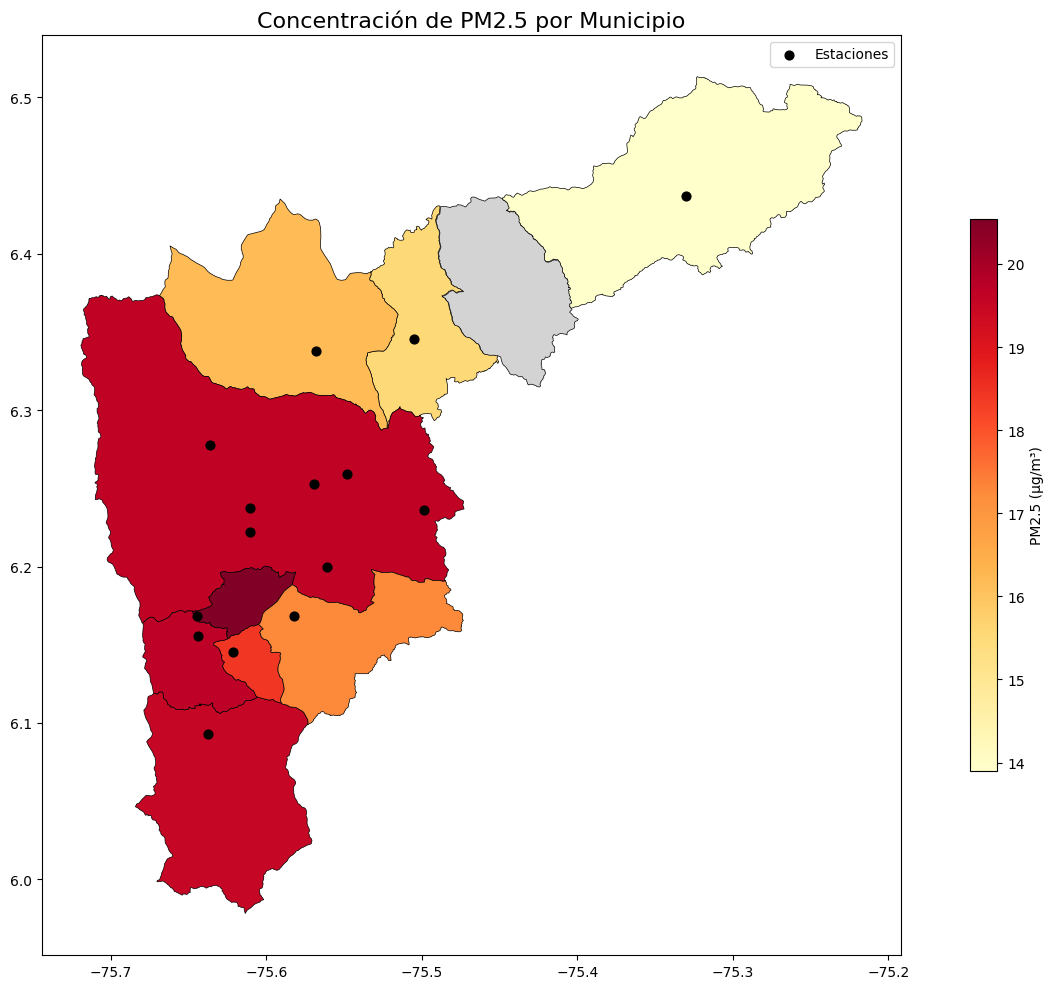

In [87]:
# -*- coding: utf-8 -*-
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point


# 2. Preparar datos de estaciones (15 estaciones únicas)
coords_estaciones = esthorario.groupby('Estacion')[['Longitud', 'Latitud']].first().reset_index()

estaciones_gdf = gpd.GeoDataFrame(
    coords_estaciones,
    geometry=gpd.points_from_xy(coords_estaciones['Longitud'], coords_estaciones['Latitud']),
    crs="EPSG:4326"
)

# 3. Spatial Join estaciones-municipios
municipios = municipios.to_crs(estaciones_gdf.crs)
estaciones_municipios = gpd.sjoin(estaciones_gdf, municipios, how="left", predicate="within")

# 4. Procesar resultados MGWR (promedio por estación)
esthorario['PM25_estimado'] = np.exp(mgwr_model.predy)  # Conversión a escala lineal
resultados_estaciones = esthorario.groupby('Estacion')['PM25_estimado'].mean().reset_index()
resultados_geo = estaciones_municipios.merge(resultados_estaciones, on='Estacion', how='left')

# 5. Agregar a nivel municipal
resultados_municipios = resultados_geo.dissolve(by='MPIO_NOMBR', aggfunc={'PM25_estimado': 'mean'}).reset_index()
mapa_final = municipios.merge(resultados_municipios[['MPIO_NOMBR', 'PM25_estimado']], on='MPIO_NOMBR', how='left')

# 6. Visualización (sin etiquetas de texto)
fig, ax = plt.subplots(figsize=(14, 10))

# Mapa de municipios
mapa_final.plot(
    column='PM25_estimado',
    cmap='YlOrRd',
    legend=True,
    legend_kwds={'label': "PM2.5 (μg/m³)", 'shrink': 0.6},
    ax=ax,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey'}
)

# Añadir estaciones (puntos simples)
estaciones_gdf.plot(
    ax=ax,
    color='black',
    markersize=40,
    marker='o',
    label='Estaciones'
)

# Personalización minimalista
ax.set_title("Concentración de PM2.5 por Municipio", fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Asumiento que tienes una columna que relaciona estaciones con municipios
resultados = pd.DataFrame({
    'Estacion': esthorario['Estacion'],  # o el nombre de tu columna
    'PM25_estimado': np.exp(mgwr_model.predy),  # Antilog si usaste logpm25
    'Latitud': coords[:,1],
    'Longitud': coords[:,0]
})

# Unir con shapefile (ajusta según tu estructura)
mapa_pm25 = municipios.merge(resultados, on='CODIGO_MUNICIPIO')  # usa tu columna de unión

# Graficar
fig, ax = plt.subplots(figsize=(10, 8))
mapa_pm25.plot(column='PM25_estimado', cmap='YlOrRd', legend=True, 
               scheme='quantiles', ax=ax, edgecolor='gray')
ax.set_title('Concentraciones estimadas de PM2.5 por municipio')
plt.show()

In [39]:
mgwr_model = MGWR(coords, y, X, selector)
mgwr_results = mgwr_model.fit() 

In [42]:

y_pred = mgwr_results.predy
y_obs = mgwr_results.model.y

# Promedio de y
y_mean = y_obs.mean()

# Calcular R² local manualmente
numerador = (y_obs - y_pred)**2
denominador = (y_obs - y_mean)**2
local_r2 = 1 - (numerador / denominador)



Los resultados me indican que el efecto de la preipitación es global casi el mismo , mientras que la temperatura varia, este modelo tiene resultados más intiutivos debido a que la temperatura tiene un efecto positivo en el pm25, mientras que la lluvia presenta un efecto negativo

In [59]:
from mgwr.gwr import MGWR
from mgwr.sel_bw import Sel_BW
from sklearn.preprocessing import StandardScaler
import pandas as pd

resultados_mgwr = []

for hora in range(1, 25):
    df_hora = esthorario[esthorario['hora'] == hora]

    if len(df_hora) < 10:
        print(f"Hora {hora} omitida por pocos datos ({len(df_hora)} observaciones)")
        continue

    coords = df_hora[['Longitud', 'Latitud']].values
    y = df_hora[['logpm25']].values
    X = df_hora[['pp_horaria', 'temperatura']].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    try:
        selector = Sel_BW(coords, y, X_scaled, multi=True, fixed=True)
        bw = selector.search(bw_min=2, bw_max=5)

        mgwr_model = MGWR(coords, y, X_scaled, selector, fixed=True).fit()

        df_coef = pd.DataFrame(
            mgwr_model.params,
            columns=['Intercepto', 'pp_horaria', 'temperatura']
        )
        df_coef['hora'] = hora
        df_coef['Codigo'] = df_hora['Codigo'].values

        resultados_mgwr.append(df_coef)

    except Exception as e:
        print(f"Error en hora {hora}: {e}")


In [60]:
results = {
    'hora': hora,
    'R2': mgwr_model.R2,
    'aic': mgwr_model.aic,
    'bw': bw,
    'params': mgwr_model.params
}
resultados_mgwr.append(results)

{'hora': 24,
 'R2': 0.5423343813532928,
 'aic': -5.849126272589906,
 'bw': array([0.35, 0.39, 0.92]),
 'params': array([[ 2.95562582, -0.05641132,  0.11833559],
        [ 2.97894581, -0.06441801,  0.1186582 ],
        [ 2.99076647, -0.0694728 ,  0.11885115],
        [ 2.98099686, -0.06528838,  0.11869236],
        [ 2.96677764, -0.06039229,  0.11847465],
        [ 2.95045695, -0.05486955,  0.11829023],
        [ 2.72060305,  0.14652098,  0.11719849],
        [ 2.91445589, -0.03709104,  0.11793989],
        [ 2.96435658, -0.05902038,  0.11843058],
        [ 2.96443509, -0.06171522,  0.11848626],
        [ 2.96083331, -0.05571613,  0.11834864],
        [ 2.93486894, -0.04484564,  0.11806383],
        [ 2.97188499, -0.06469417,  0.11859847],
        [ 2.97991518, -0.06612525,  0.11869847],
        [ 2.94576765, -0.05565858,  0.11830786]])}

In [57]:
df_mgwr_all = pd.concat(resultados_mgwr, ignore_index=True)
df_mgwr_all

Intercepto  pp_horaria  temperatura  hora  Codigo
0      2.926501   -0.037045     0.132104     1      12
1      2.941749   -0.044189     0.132338     1      38
2      2.946288   -0.046518     0.132623     1      69
3      2.942660   -0.044617     0.132385     1      78
4      2.934025   -0.041638     0.132181     1      79
..          ...         ...          ...   ...     ...
355    2.960833   -0.055716     0.118349    24      85
356    2.934869   -0.044846     0.118064    24      87
357    2.971885   -0.064694     0.118598    24      88
358    2.979915   -0.066125     0.118698    24      90
359    2.945768   -0.055659     0.118308    24      94

[360 rows x 5 columns]

In [12]:
from shapely.geometry import Point

estaciones_gdf = esthorario[['Codigo', 'Longitud', 'Latitud']].drop_duplicates()
estaciones_gdf['geometry'] = estaciones_gdf.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)
estaciones_gdf = gpd.GeoDataFrame(estaciones_gdf, geometry='geometry', crs='EPSG:4326')


In [13]:
estaciones_gdf

Codigo  Longitud  Latitud                   geometry
0        12 -75.56958  6.25256  POINT (-75.56958 6.25256)
24       38 -75.64436  6.16850  POINT (-75.64436 6.16850)
48       69 -75.63776  6.09308  POINT (-75.63776 6.09308)
72       78 -75.64417  6.15553  POINT (-75.64417 6.15553)
96       79 -75.61060  6.22189  POINT (-75.61060 6.22189)
120      80 -75.54826  6.25891  POINT (-75.54826 6.25891)
144      81 -75.33040  6.43696  POINT (-75.33040 6.43696)
168      82 -75.50475  6.34536  POINT (-75.50475 6.34536)
192      83 -75.61047  6.23723  POINT (-75.61047 6.23723)
216      84 -75.56095  6.19987  POINT (-75.56095 6.19987)
240      85 -75.63643  6.27785  POINT (-75.63643 6.27785)
264      87 -75.56780  6.33755  POINT (-75.56780 6.33755)
288      88 -75.58197  6.16868  POINT (-75.58197 6.16868)
312      90 -75.62126  6.14550  POINT (-75.62126 6.14550)
336      94 -75.49847  6.23636  POINT (-75.49847 6.23636)

In [14]:
df_mgwr_geo = df_mgwr_all.merge(estaciones_gdf, on='Codigo')
df_mgwr_geo = gpd.GeoDataFrame(df_mgwr_geo, geometry='geometry', crs='EPSG:4326')

In [15]:
df_mgwr_geo

Intercepto  pp_horaria  temperatura  hora  Codigo  Longitud  Latitud   
0      2.926501   -0.037045     0.132104     1      12 -75.56958  6.25256  \
1      2.903089    0.085500     0.143112     2      12 -75.56958  6.25256   
2      2.864055    0.067772     0.161746     3      12 -75.56958  6.25256   
3      2.866226   -0.000544     0.149958     4      12 -75.56958  6.25256   
4      2.855645   -0.069202     0.187514     5      12 -75.56958  6.25256   
..          ...         ...          ...   ...     ...       ...      ...   
355    2.762881   -0.035124     0.076770    20      94 -75.49847  6.23636   
356    2.880050    0.095769     0.090232    21      94 -75.49847  6.23636   
357    2.944174    0.011470     0.079740    22      94 -75.49847  6.23636   
358    2.969888   -0.117436     0.160232    23      94 -75.49847  6.23636   
359    2.945768   -0.055659     0.118308    24      94 -75.49847  6.23636   

                      geometry  
0    POINT (-75.56958 6.25256)  
1    POINT (-75.56958 6.25256)  
2    POINT (-75.56958 6.25256)  
3    POINT (-75.56958 6.25256)  
4    POINT (-75.56958 6.25256)  
..                         ...  
355  POINT (-75.49847 6.23636)  
356  POINT (-75.49847 6.23636)  
357  POINT (-75.49847 6.23636)  
358  POINT (-75.49847 6.23636)  
359  POINT (-75.49847 6.23636)  

[360 rows x 8 columns]

In [37]:
import fiona
import geopandas as gpd


with fiona.open(r"C:\Users\Documents\unal\analisis geoespacial\municipios.shp") as src:
    municipios = gpd.GeoDataFrame.from_features(src, crs=src.crs)
print(municipios)

                                              geometry COD_MPIO   
0    POLYGON ((-8427867.000 738709.000, -8428054.00...    05761  \
1    POLYGON ((-8304758.000 742497.000, -8304773.00...    05425   
2    POLYGON ((-8436132.000 743636.000, -8436249.00...    05501   
3    POLYGON ((-8409090.000 744978.000, -8409293.00...    05264   
4    POLYGON ((-8441715.000 741929.000, -8441743.00...    05042   
..                                                 ...      ...   
120  POLYGON ((-8339929.000 813321.000, -8340225.00...    05031   
121  POLYGON ((-8224919.000 781410.000, -8224753.00...    05893   
122  POLYGON ((-8455187.000 645985.000, -8455208.00...    05091   
123  POLYGON ((-8426179.000 754196.000, -8426332.00...    05086   
124  POLYGON ((-8430682.000 759439.000, -8430775.00...    05411   

                MPIO_NOMBR        SUBREGION  ALERTA DESCRIPCI SymbolID  
0                 SOPETRÁN        OCCIDENTE       0      None     None  
1                    MACEO  MAGDALENA MEDIO      

In [74]:
import geopandas as gpd
import fiona

print(f"Geopandas: {gpd.__version__}")  # Debería ser >=0.10.0
print(f"Fiona: {fiona.__version__}")    # Debería ser >=2.0.0

Geopandas: 0.12.2
Fiona: 1.10.1


In [38]:
municipios.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
munic_sle=["MEDELLÍN", "ITAGÜÍ", "SABANETA","ENVIGADO","GIRARDOTA","BELLO","LA ESTRELLA", "CALDAS", "COPACABANA","BARBOSA"]
municipios=municipios[municipios["MPIO_NOMBR"].isin(munic_sle)]
print(municipios)

                                             geometry COD_MPIO   MPIO_NOMBR   
5   POLYGON ((-8423133.000 682404.000, -8423156.00...    05129       CALDAS  \
9   POLYGON ((-8416321.000 687413.000, -8416447.00...    05631     SABANETA   
25  POLYGON ((-8403569.000 716459.000, -8403565.00...    05212   COPACABANA   
29  POLYGON ((-8384926.000 726611.000, -8384950.00...    05079      BARBOSA   
58  POLYGON ((-8413842.000 716749.000, -8413963.00...    05088        BELLO   
60  POLYGON ((-8398732.000 717756.000, -8398820.00...    05308    GIRARDOTA   
95  POLYGON ((-8423404.000 710923.000, -8423505.00...    05001     MEDELLÍN   
96  POLYGON ((-8421637.000 688275.000, -8421759.00...    05380  LA ESTRELLA   
98  POLYGON ((-8415772.000 691556.000, -8415873.00...    05360       ITAGÜÍ   
99  POLYGON ((-8407607.000 691150.000, -8407978.00...    05266     ENVIGADO   

          SUBREGION  ALERTA DESCRIPCI SymbolID  
5   VALLE DE ABURRA       0      None     None  
9   VALLE DE ABURRA       3     

In [40]:
municipios = municipios.to_crs('EPSG:4326')

In [21]:
mgwr_joined = gpd.sjoin(df_mgwr_geo, municipios, how='left', predicate='within')


In [22]:
mgwr_joined

Intercepto  pp_horaria  temperatura  hora  Codigo  Longitud  Latitud   
0      2.926501   -0.037045     0.132104     1      12 -75.56958  6.25256  \
1      2.903089    0.085500     0.143112     2      12 -75.56958  6.25256   
2      2.864055    0.067772     0.161746     3      12 -75.56958  6.25256   
3      2.866226   -0.000544     0.149958     4      12 -75.56958  6.25256   
4      2.855645   -0.069202     0.187514     5      12 -75.56958  6.25256   
..          ...         ...          ...   ...     ...       ...      ...   
355    2.762881   -0.035124     0.076770    20      94 -75.49847  6.23636   
356    2.880050    0.095769     0.090232    21      94 -75.49847  6.23636   
357    2.944174    0.011470     0.079740    22      94 -75.49847  6.23636   
358    2.969888   -0.117436     0.160232    23      94 -75.49847  6.23636   
359    2.945768   -0.055659     0.118308    24      94 -75.49847  6.23636   

                      geometry  index_right COD_MPIO MPIO_NOMBR   
0    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN  \
1    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
2    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
3    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
4    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
..                         ...          ...      ...        ...   
355  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
356  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
357  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
358  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
359  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   

           SUBREGION  ALERTA DESCRIPCI SymbolID  
0    VALLE DE ABURRA       0      None     None  
1    VALLE DE ABURRA       0      None     None  
2    VALLE DE ABURRA       0      None     None  
3    VALLE DE ABURRA       0      None     None  
4    VALLE DE ABURRA       0      None     None  
..               ...     ...       ...      ...  
355  VALLE DE ABURRA       0      None     None  
356  VALLE DE ABURRA       0      None     None  
357  VALLE DE ABURRA       0      None     None  
358  VALLE DE ABURRA       0      None     None  
359  VALLE DE ABURRA       0      None     None  

[360 rows x 15 columns]

In [48]:
esthorario

Unnamed: 0  Codigo                 Estacion  Longitud  Latitud    Ciudad   
0             0      12  Estación Tráfico Centro -75.56958  6.25256  Medellin  \
1             1      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
2             2      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
3             3      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
4             4      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
..          ...     ...                      ...       ...      ...       ...   
355         355      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
356         356      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
357         357      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
358         358      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
359         359      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   

                      geometry  hora       pm25  pp_horaria  temperatura   
0    POINT (-75.56958 6.25256)     1  28.026581    0.294968    19.163871  \
1    POINT (-75.56958 6.25256)     2  27.870992    0.540774    18.928801   
2    POINT (-75.56958 6.25256)     3  27.077382    1.122516    18.679000   
3    POINT (-75.56958 6.25256)     4  26.379148    0.409677    18.487376   
4    POINT (-75.56958 6.25256)     5  26.380198    0.270387    18.398113   
..                         ...   ...        ...         ...          ...   
355  POINT (-75.49847 6.23636)    20  11.010333    0.098323    12.894070   
356  POINT (-75.49847 6.23636)    21  12.649717    0.409677    12.673548   
357  POINT (-75.49847 6.23636)    22  12.676909    0.122903    12.506495   
358  POINT (-75.49847 6.23636)    23  11.904949    0.155677    12.283457   
359  POINT (-75.49847 6.23636)    24  10.743358    0.876710    12.044747   

      logpm25  
0    3.368212  
1    3.362837  
2    3.334964  
3    3.309782  
4    3.309820  
..        ...  
355  2.485767  
356  2.613719  
357  2.615709  
358  2.557611  
359  2.463288  

[360 rows x 12 columns]

In [24]:
promedios_muni = mgwr_joined.groupby(['MPIO_NOMBR','hora'])[['pp_horaria', 'temperatura', 'Intercepto']].mean().reset_index()

In [25]:
promedios_muni

MPIO_NOMBR  hora  pp_horaria  temperatura  Intercepto
0      BARBOSA     1    0.262305     0.131298    2.824913
1      BARBOSA     2    0.244801     0.144879    2.898688
2      BARBOSA     3    0.141398     0.161433    2.826114
3      BARBOSA     4    0.010111     0.148752    2.647264
4      BARBOSA     5   -0.064954     0.186484    2.623890
..         ...   ...         ...          ...         ...
211   SABANETA    20   -0.033684     0.078053    2.802601
212   SABANETA    21    0.096735     0.076476    2.916767
213   SABANETA    22    0.017416     0.080267    2.969251
214   SABANETA    23   -0.117864    -0.045050    2.969161
215   SABANETA    24   -0.066125     0.118698    2.979915

[216 rows x 5 columns]

In [29]:
municipios_coef = municipios.merge(promedios_muni, on='MPIO_NOMBR')

In [30]:
municipios_coef

geometry COD_MPIO MPIO_NOMBR   
0    POLYGON ((-75.66629 6.11848, -75.66650 6.11914...    05129     CALDAS  \
1    POLYGON ((-75.66629 6.11848, -75.66650 6.11914...    05129     CALDAS   
2    POLYGON ((-75.66629 6.11848, -75.66650 6.11914...    05129     CALDAS   
3    POLYGON ((-75.66629 6.11848, -75.66650 6.11914...    05129     CALDAS   
4    POLYGON ((-75.66629 6.11848, -75.66650 6.11914...    05129     CALDAS   
..                                                 ...      ...        ...   
211  POLYGON ((-75.52682 6.19659, -75.53015 6.19734...    05266   ENVIGADO   
212  POLYGON ((-75.52682 6.19659, -75.53015 6.19734...    05266   ENVIGADO   
213  POLYGON ((-75.52682 6.19659, -75.53015 6.19734...    05266   ENVIGADO   
214  POLYGON ((-75.52682 6.19659, -75.53015 6.19734...    05266   ENVIGADO   
215  POLYGON ((-75.52682 6.19659, -75.53015 6.19734...    05266   ENVIGADO   

           SUBREGION  ALERTA DESCRIPCI SymbolID  hora  pp_horaria   
0    VALLE DE ABURRA       0      None     None     1   -0.046518  \
1    VALLE DE ABURRA       0      None     None     2    0.050898   
2    VALLE DE ABURRA       0      None     None     3    0.043166   
3    VALLE DE ABURRA       0      None     None     4   -0.005157   
4    VALLE DE ABURRA       0      None     None     5   -0.071272   
..               ...     ...       ...      ...   ...         ...   
211  VALLE DE ABURRA       0      None     None    20   -0.034094   
212  VALLE DE ABURRA       0      None     None    21    0.096455   
213  VALLE DE ABURRA       0      None     None    22    0.015651   
214  VALLE DE ABURRA       0      None     None    23   -0.117741   
215  VALLE DE ABURRA       0      None     None    24   -0.064694   

     temperatura  Intercepto  
0       0.132623    2.946288  
1       0.141861    2.904408  
2       0.161771    2.875983  
3       0.150589    2.881129  
4       0.188090    2.880141  
..           ...         ...  
211     0.077682    2.793373  
212     0.083466    2.908429  
213     0.080123    2.964199  
214     0.105429    2.969347  
215     0.118598    2.971885  

[216 rows x 11 columns]

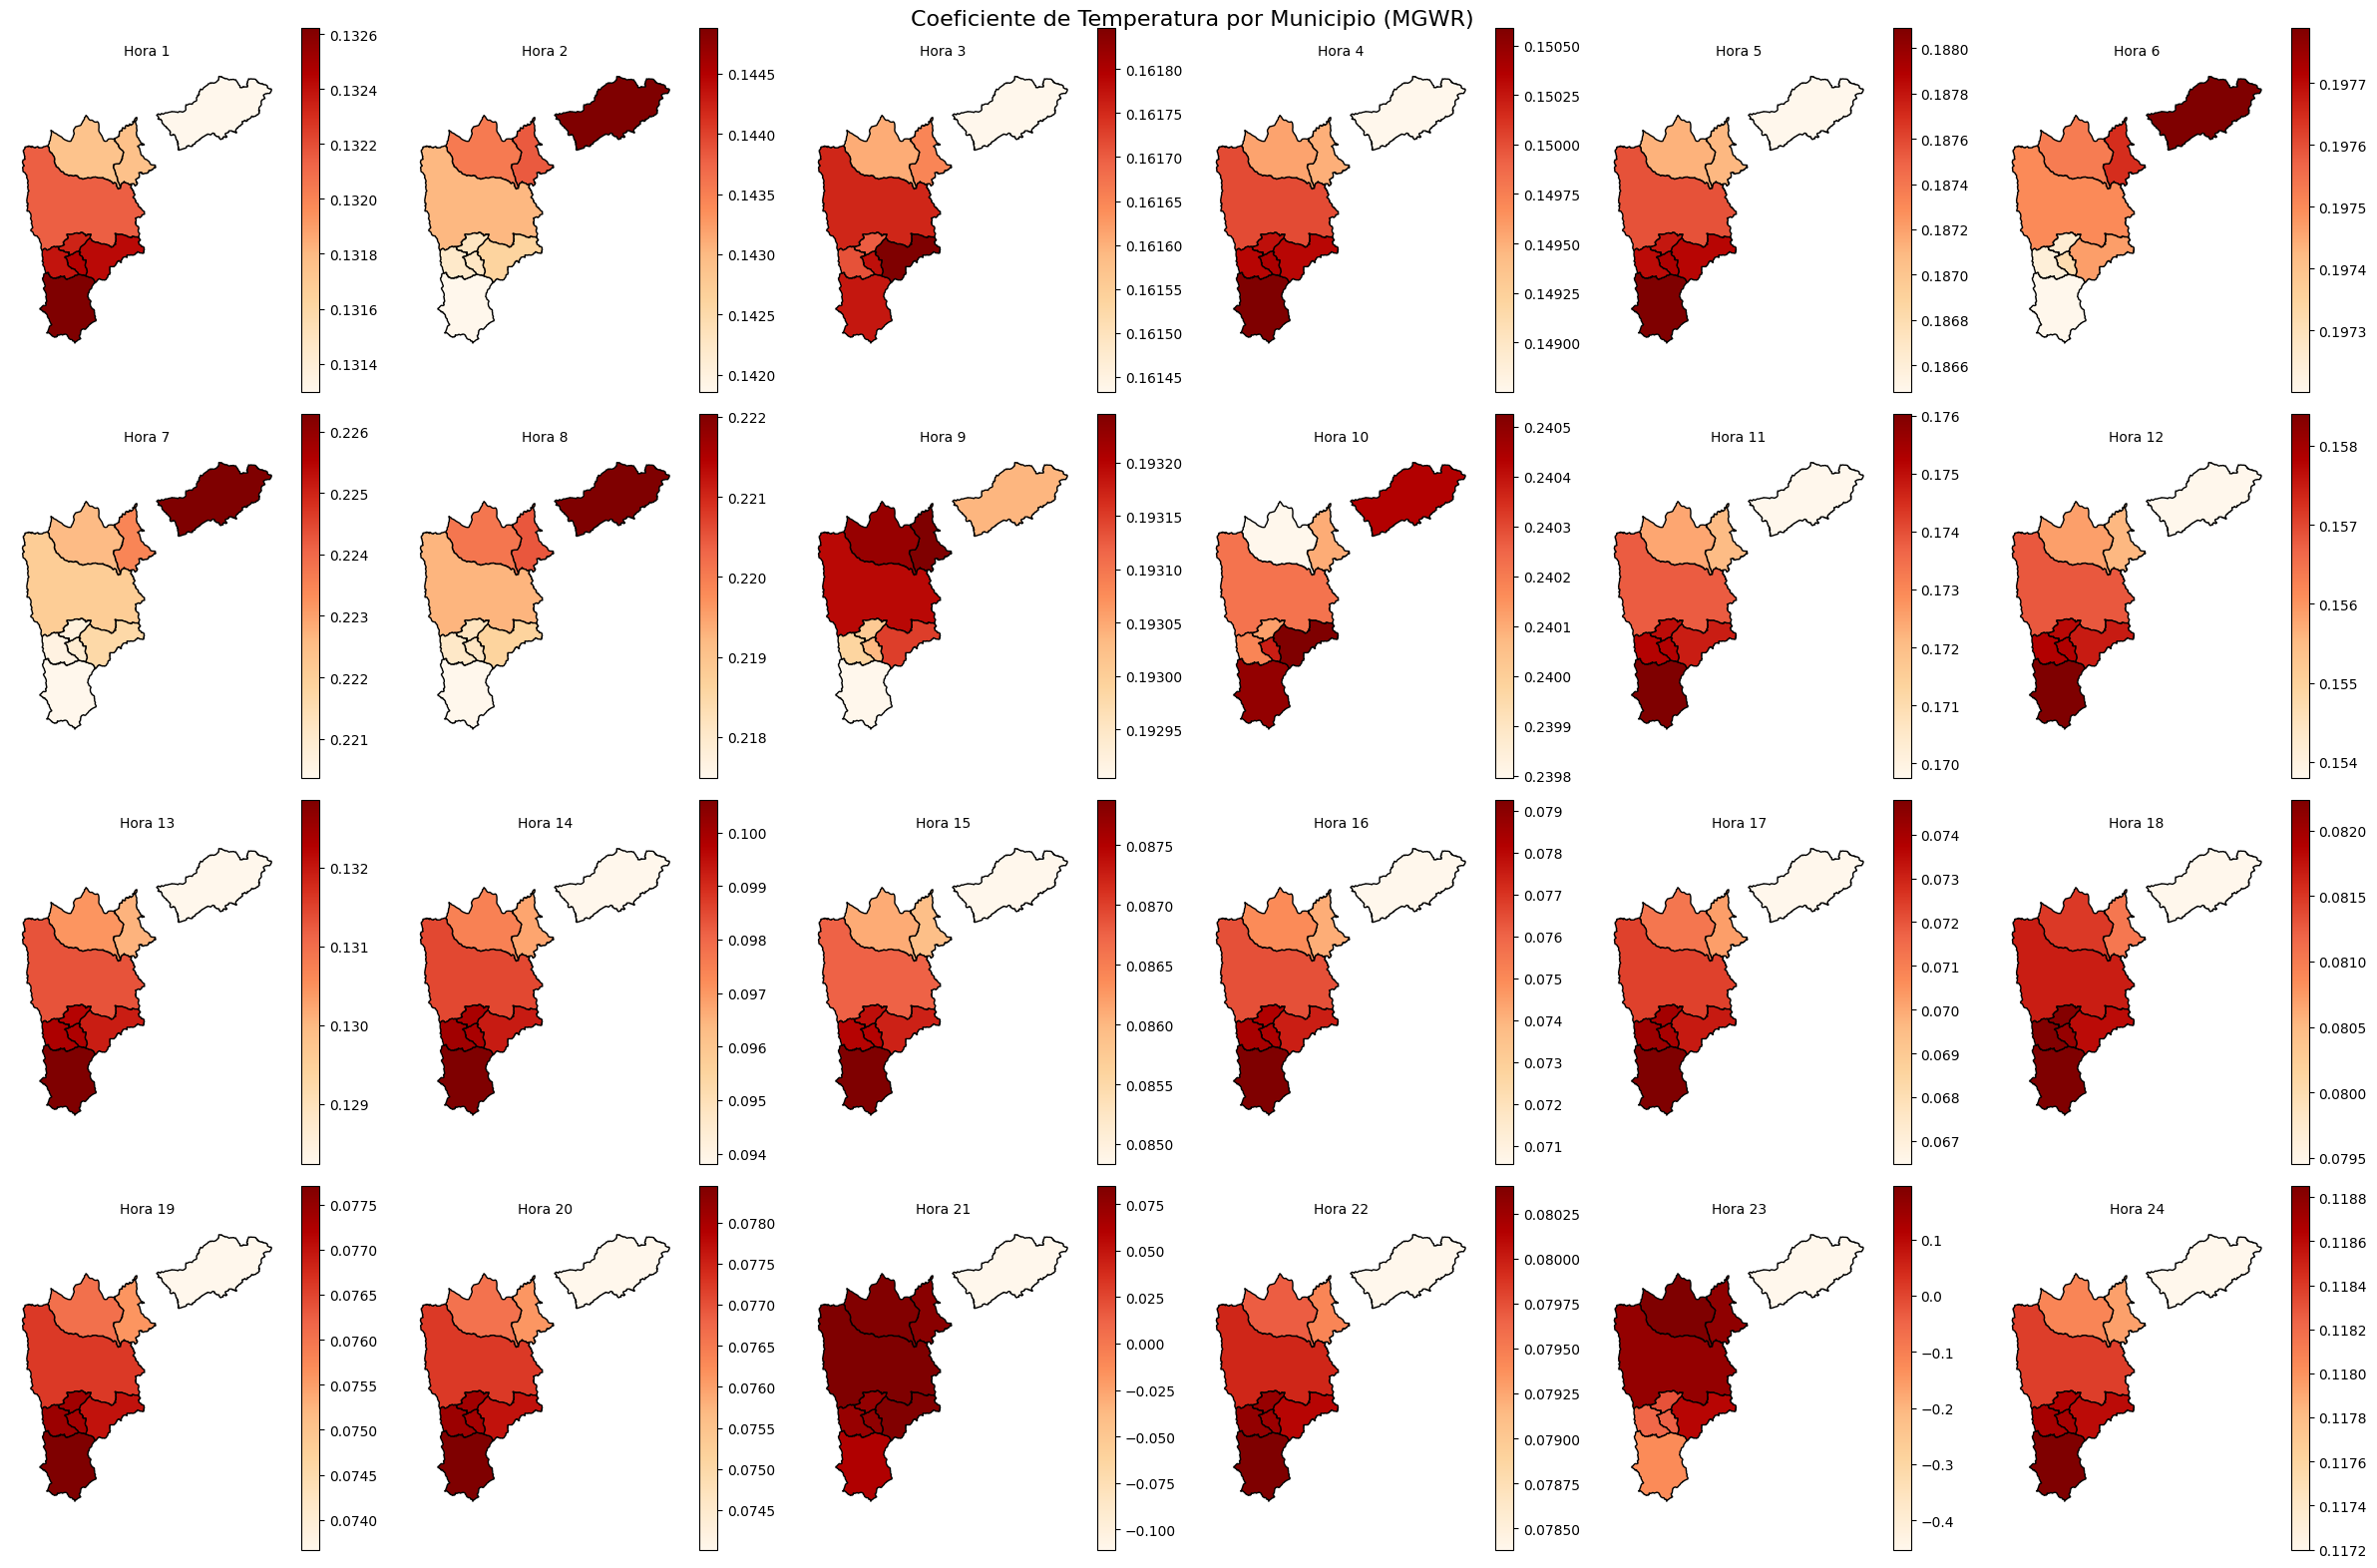

In [34]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(24, 16))
axes = axes.flatten()

for i, hora in enumerate(range(1, 25)):
    ax = axes[i]
    municipios_coef[municipios_coef['hora'] == hora].plot(
        column='temperatura', ax=ax, cmap='OrRd', edgecolor='black', legend=True
    )
    ax.set_title(f'Hora {hora}', fontsize=10)
    ax.axis('off')

plt.suptitle('Coeficiente de Temperatura por Municipio (MGWR)', fontsize=16)
plt.tight_layout()
plt.show()


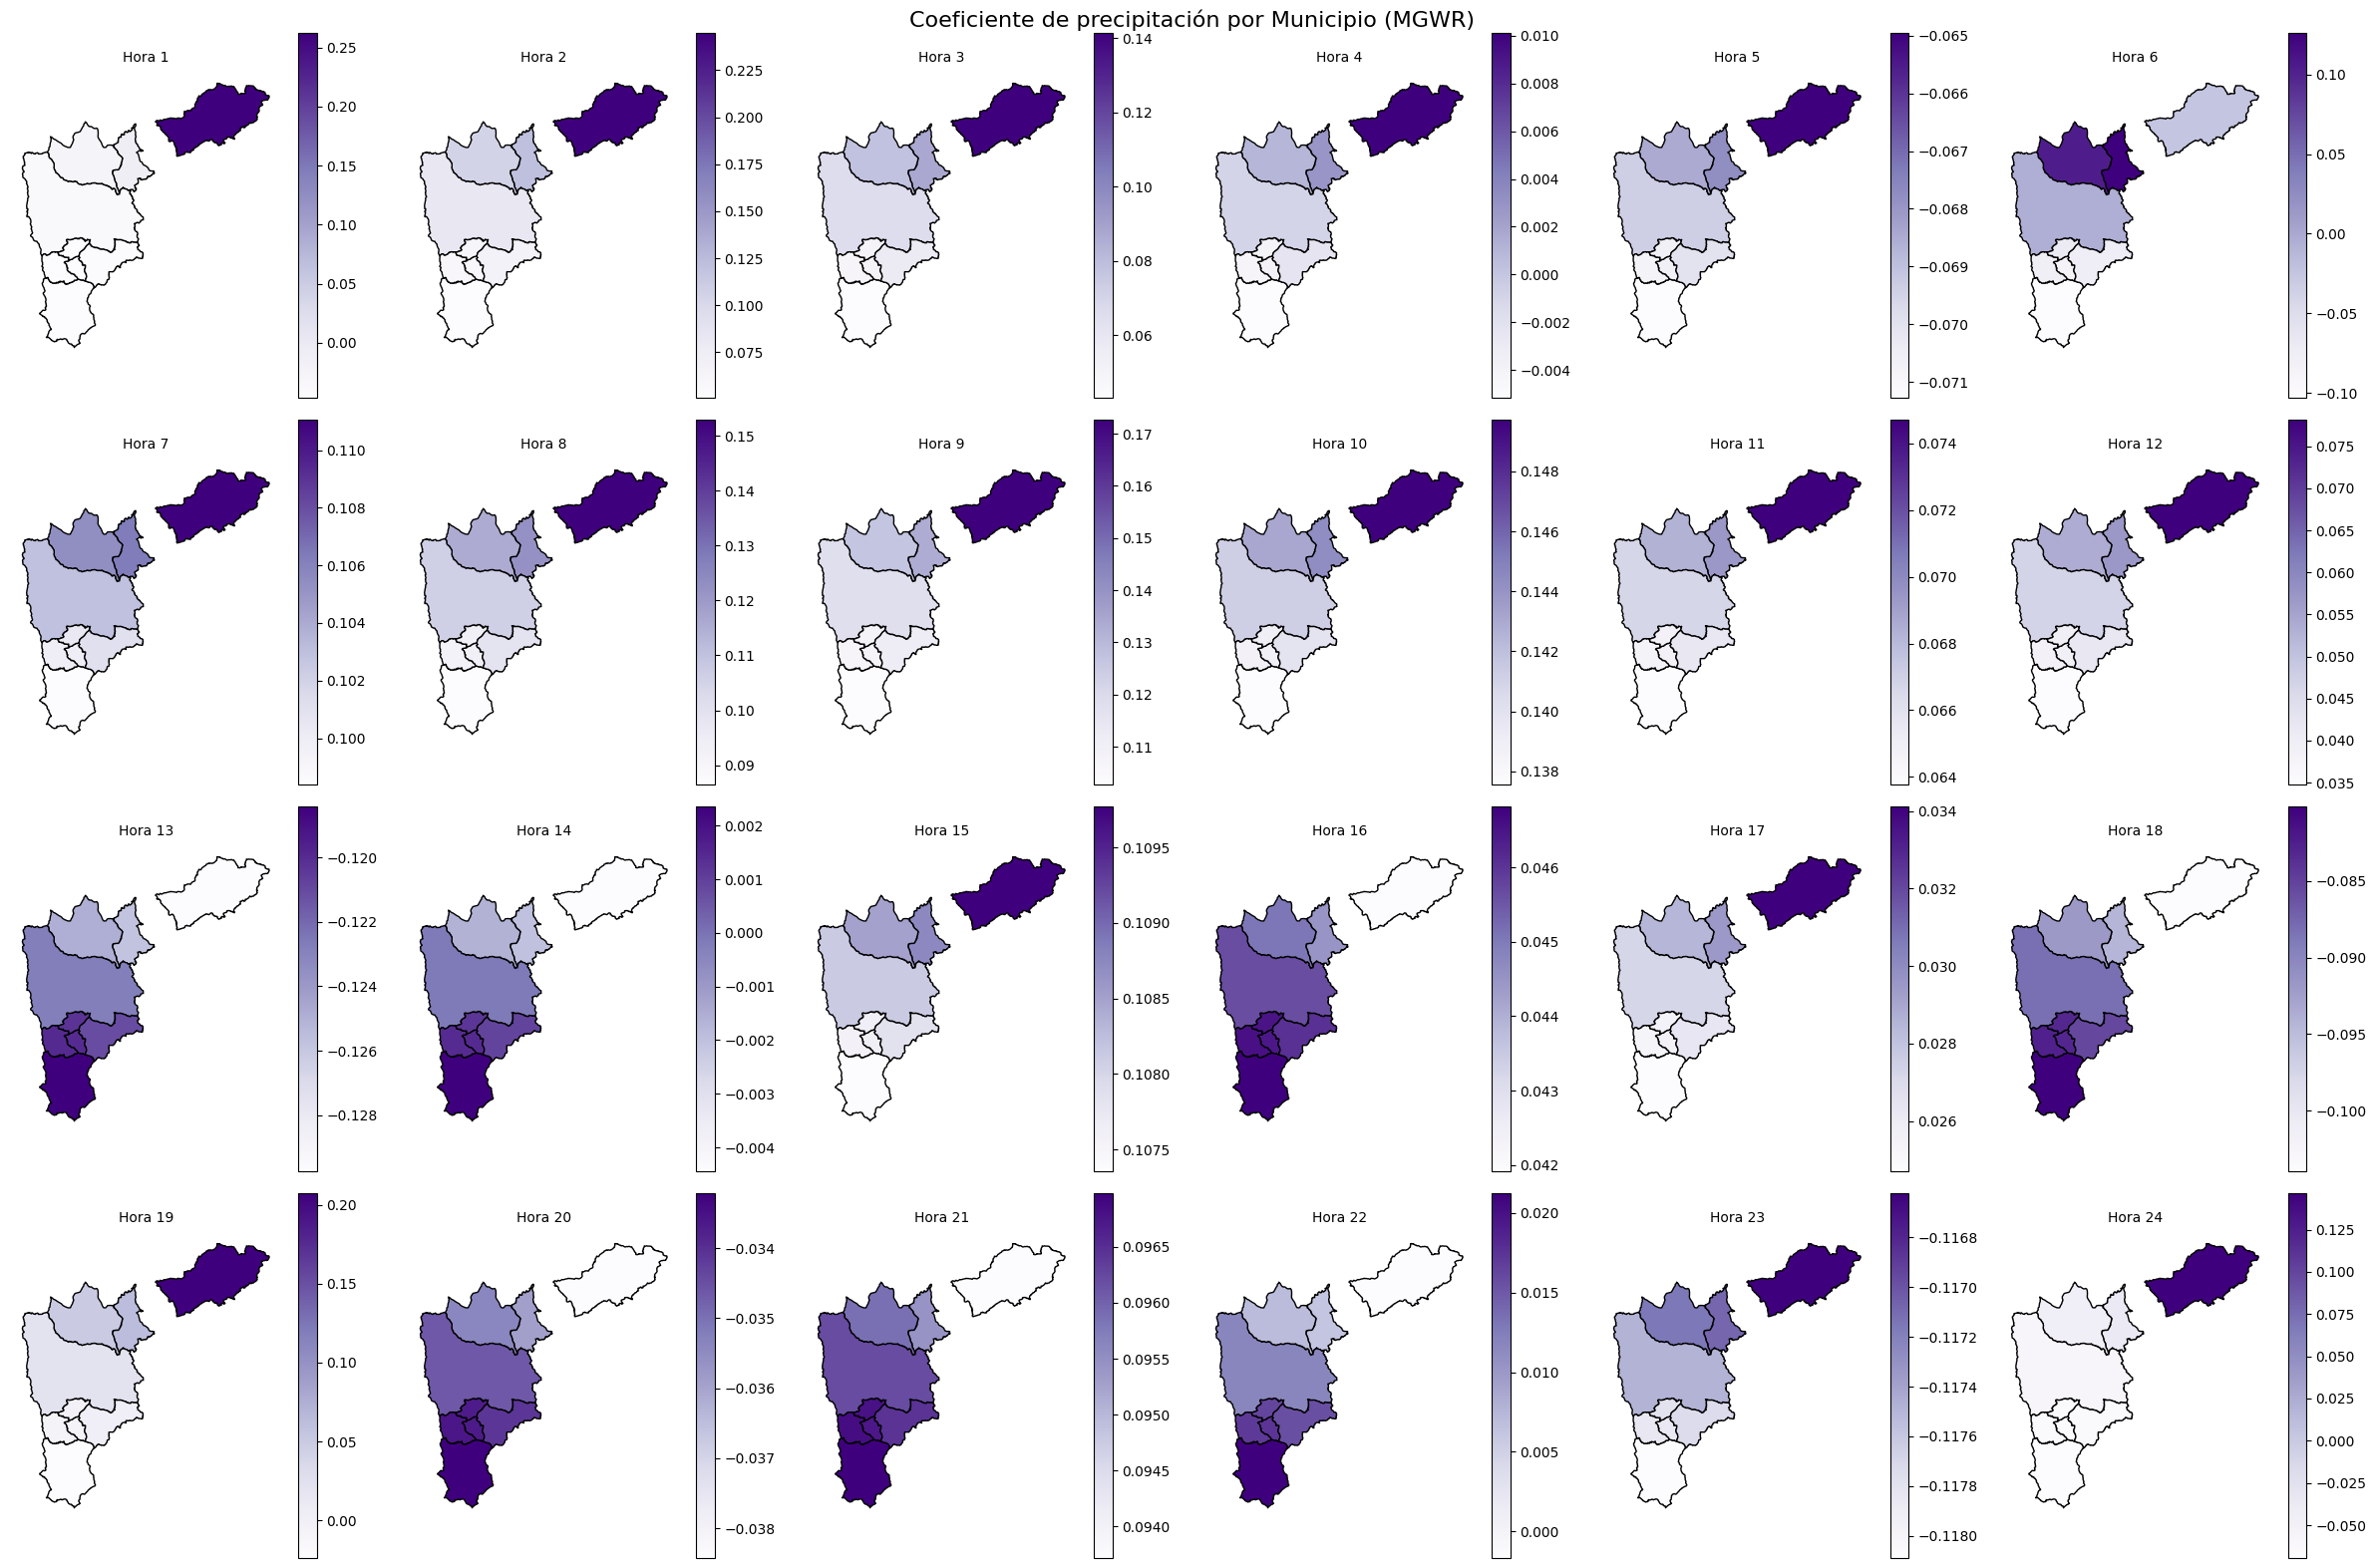

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(24, 16))
axes = axes.flatten()

for i, hora in enumerate(range(1, 25)):
    ax = axes[i]
    municipios_coef[municipios_coef['hora'] == hora].plot(
        column='pp_horaria', ax=ax, cmap='Purples', edgecolor='black', legend=True
    )
    ax.set_title(f'Hora {hora}', fontsize=10)
    ax.axis('off')

plt.suptitle('Coeficiente de precipitación por Municipio (MGWR)', fontsize=16)
plt.tight_layout()
plt.show()


In [33]:
# mgwr para pm 2.5 
esthorario['geometry'] = esthorario.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)

# Convertir a GeoDataFrame
gdf_esthorario = gpd.GeoDataFrame(esthorario, geometry='geometry', crs="EPSG:4326")

In [41]:
gdf_esthorario = gpd.sjoin(gdf_esthorario, municipios, how="left", predicate="within")

In [47]:
gdf_esthorario

Unnamed: 0  Codigo  hora       pm25  pp_horaria  temperatura   
0             0      12     1  28.026581    0.294968    19.163871  \
1             1      12     2  27.870992    0.540774    18.928801   
2             2      12     3  27.077382    1.122516    18.679000   
3             3      12     4  26.379148    0.409677    18.487376   
4             4      12     5  26.380198    0.270387    18.398113   
..          ...     ...   ...        ...         ...          ...   
355         355      94    20  11.010333    0.098323    12.894070   
356         356      94    21  12.649717    0.409677    12.673548   
357         357      94    22  12.676909    0.122903    12.506495   
358         358      94    23  11.904949    0.155677    12.283457   
359         359      94    24  10.743358    0.876710    12.044747   

                    Estacion  Longitud  Latitud    Ciudad   logpm25   
0    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.368212  \
1    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.362837   
2    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.334964   
3    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.309782   
4    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.309820   
..                       ...       ...      ...       ...       ...   
355   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.485767   
356   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.613719   
357   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.615709   
358   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.557611   
359   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.463288   

                      geometry  index_right COD_MPIO MPIO_NOMBR   
0    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN  \
1    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
2    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
3    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
4    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
..                         ...          ...      ...        ...   
355  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
356  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
357  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
358  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
359  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   

           SUBREGION  ALERTA DESCRIPCI SymbolID  
0    VALLE DE ABURRA       0      None     None  
1    VALLE DE ABURRA       0      None     None  
2    VALLE DE ABURRA       0      None     None  
3    VALLE DE ABURRA       0      None     None  
4    VALLE DE ABURRA       0      None     None  
..               ...     ...       ...      ...  
355  VALLE DE ABURRA       0      None     None  
356  VALLE DE ABURRA       0      None     None  
357  VALLE DE ABURRA       0      None     None  
358  VALLE DE ABURRA       0      None     None  
359  VALLE DE ABURRA       0      None     None  

[360 rows x 19 columns]

In [51]:
prom_mpio

MPIO_NOMBR   logpm25
0      BARBOSA  2.613507
1        BELLO  2.810786
2       CALDAS  2.966796
3   COPACABANA  2.803359
4     ENVIGADO  2.763154
5       ITAGÜÍ  3.027477
6  LA ESTRELLA  2.840328
7     MEDELLÍN  2.960052
8     SABANETA  2.866410

In [55]:
gdf_esthorario

Unnamed: 0  Codigo  hora       pm25  pp_horaria  temperatura   
0             0      12     1  28.026581    0.294968    19.163871  \
1             1      12     2  27.870992    0.540774    18.928801   
2             2      12     3  27.077382    1.122516    18.679000   
3             3      12     4  26.379148    0.409677    18.487376   
4             4      12     5  26.380198    0.270387    18.398113   
..          ...     ...   ...        ...         ...          ...   
355         355      94    20  11.010333    0.098323    12.894070   
356         356      94    21  12.649717    0.409677    12.673548   
357         357      94    22  12.676909    0.122903    12.506495   
358         358      94    23  11.904949    0.155677    12.283457   
359         359      94    24  10.743358    0.876710    12.044747   

                    Estacion  Longitud  Latitud    Ciudad   logpm25   
0    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.368212  \
1    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.362837   
2    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.334964   
3    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.309782   
4    Estación Tráfico Centro -75.56958  6.25256  Medellin  3.309820   
..                       ...       ...      ...       ...       ...   
355   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.485767   
356   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.613719   
357   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.615709   
358   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.557611   
359   Medellín - Santa Elena -75.49847  6.23636  Medellín  2.463288   

                      geometry  index_right COD_MPIO MPIO_NOMBR   
0    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN  \
1    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
2    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
3    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
4    POINT (-75.56958 6.25256)           95    05001   MEDELLÍN   
..                         ...          ...      ...        ...   
355  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
356  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
357  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
358  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   
359  POINT (-75.49847 6.23636)           95    05001   MEDELLÍN   

           SUBREGION  ALERTA DESCRIPCI SymbolID  
0    VALLE DE ABURRA       0      None     None  
1    VALLE DE ABURRA       0      None     None  
2    VALLE DE ABURRA       0      None     None  
3    VALLE DE ABURRA       0      None     None  
4    VALLE DE ABURRA       0      None     None  
..               ...     ...       ...      ...  
355  VALLE DE ABURRA       0      None     None  
356  VALLE DE ABURRA       0      None     None  
357  VALLE DE ABURRA       0      None     None  
358  VALLE DE ABURRA       0      None     None  
359  VALLE DE ABURRA       0      None     None  

[360 rows x 19 columns]


Procesando hora 01:00...
  Bandwidths calculados: [0.33 0.92 0.92]
  MGWR ajustado - R2: 0.473, RMSE: 0.162, Bandwidths: [0.33 0.92 0.92]

Procesando hora 02:00...
  Bandwidths calculados: [0.92 0.4  0.92]
  MGWR ajustado - R2: 0.528, RMSE: 0.163, Bandwidths: [0.92 0.4  0.92]

Procesando hora 03:00...
  Bandwidths calculados: [0.37 0.92 0.92]
  MGWR ajustado - R2: 0.460, RMSE: 0.178, Bandwidths: [0.37 0.92 0.92]

Procesando hora 04:00...
  Bandwidths calculados: [0.36 0.92 0.92]
  MGWR ajustado - R2: 0.421, RMSE: 0.192, Bandwidths: [0.36 0.92 0.92]

Procesando hora 05:00...
  Bandwidths calculados: [0.42 0.35 0.92]
  MGWR ajustado - R2: 0.505, RMSE: 0.183, Bandwidths: [0.42 0.35 0.92]

Procesando hora 06:00...
  Bandwidths calculados: [0.55 0.38 0.92]
  MGWR ajustado - R2: 0.428, RMSE: 0.209, Bandwidths: [0.55 0.38 0.92]

Procesando hora 07:00...
  Bandwidths calculados: [0.6  0.92 0.34]
  MGWR ajustado - R2: 0.555, RMSE: 0.203, Bandwidths: [0.6  0.92 0.34]

Procesando hora 08:00...
 

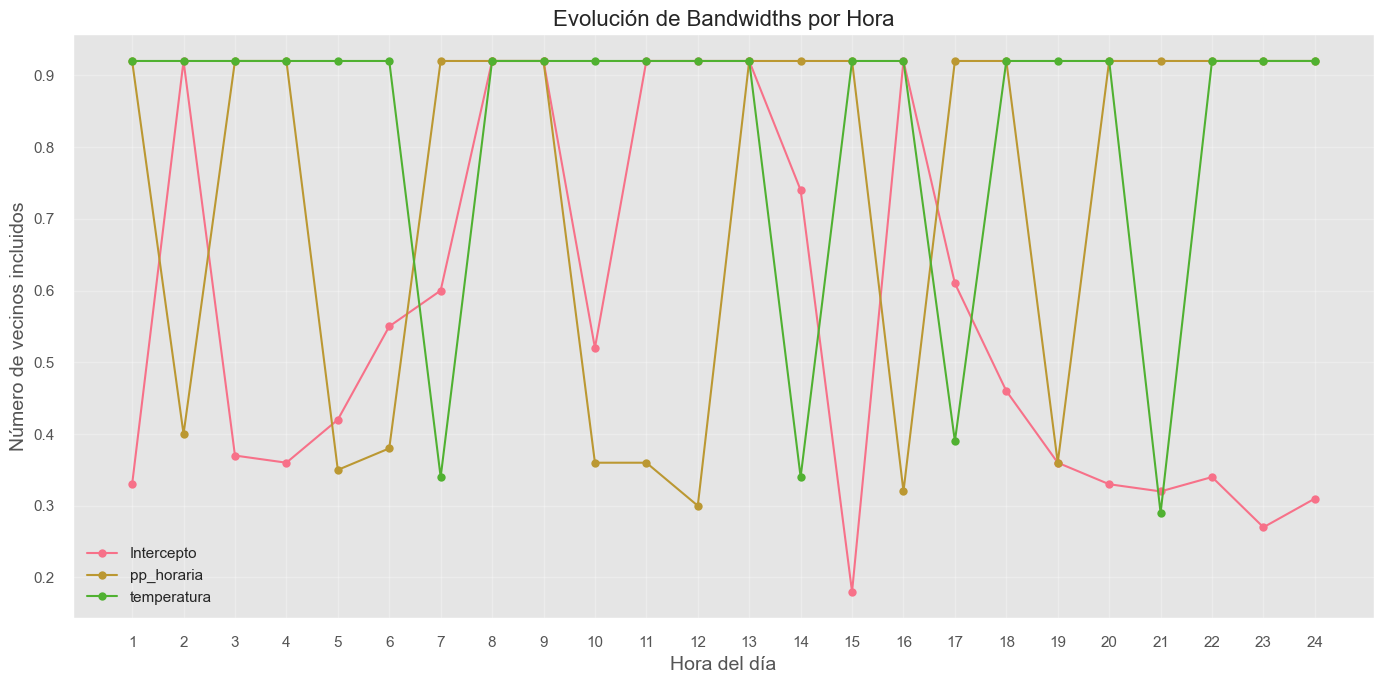


Datos guardados en CSV: resultados_mgwr_completos.csv y metricas_y_bandwidths.csv


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import MGWR

# 1. Configuración inicial
# ----------------------------------------------
# Asegúrate de tener ya definidos:
# - esthorario: DataFrame con tus datos horarios
# - predictors: Lista de variables predictoras (ej: ['pp_horaria', 'temperatura'])
# - scaler: Objeto scaler ya ajustado
# - n_estaciones: Número total de estaciones

# 2. Bucle horario con almacenamiento de bandwidths
# ----------------------------------------------
resultados_mgwr = []
metricas_horarias = []

for hora in range(1, 25):
    print(f"\nProcesando hora {hora:02d}:00...")
    
    mask = esthorario['hora'] == hora
    df_hora = esthorario[mask].copy()
    
    # Verificar datos suficientes
    if len(df_hora) < n_estaciones:
        print(f"  Hora {hora:02d}: Solo {len(df_hora)}/{n_estaciones} estaciones disponibles")
        continue
    
    try:
        # Preparación de datos
        coords = df_hora[['Longitud', 'Latitud']].values
        y = df_hora['logpm25'].values.reshape(-1, 1)
        X_scaled = scaler.transform(df_hora[predictors].values)
        X_with_intercept = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])
        
        # Selección de bandwidth
        selector = Sel_BW(coords, y, X_scaled, multi=True, fixed=True)
        bw_max = min(15, n_estaciones-1)
        bw = selector.search(bw_min=2, bw_max=bw_max)
        print(f"  Bandwidths calculados: {bw}")
        
        # Ajuste del modelo
        mgwr_model = MGWR(coords, y, X_scaled, selector, fixed=True, sigma2_v1=True).fit()
        
        # Almacenar coeficientes
        coef_hora = pd.DataFrame(
            mgwr_model.params,
            columns=['Intercepto'] + predictors
        )
        coef_hora['hora'] = hora
        coef_hora['Codigo'] = df_hora['Codigo'].values
        coef_hora['logpm25_obs'] = y.flatten()
        coef_hora['logpm25_pred'] = np.sum(X_with_intercept * mgwr_model.params, axis=1)
        resultados_mgwr.append(coef_hora)
        
        # Calcular métricas de error
        residuos = y.flatten() - coef_hora['logpm25_pred']
        rmse = np.sqrt(np.mean(residuos**2))
        
        # Almacenar bandwidths y métricas (ESTA ES LA PARTE CLAVE QUE PREGUNTAS)
        metricas_horarias.append({
            'hora': hora,
            'bandwidths': bw,  # Aquí guardamos los bandwidths
            'R2': mgwr_model.R2,
            'AICc': mgwr_model.aicc,
            'RMSE': rmse,
            'n_estaciones': len(df_hora),
            'residuos_media': np.mean(residuos),
            'residuos_std': np.std(residuos)
        })
        
        print(f"  MGWR ajustado - R2: {mgwr_model.R2:.3f}, RMSE: {rmse:.3f}, Bandwidths: {bw}")
        
    except Exception as e:
        print(f"  Error en hora {hora:02d}: {str(e)}")
        continue

# 3. Procesamiento de resultados
# ----------------------------------------------
if resultados_mgwr:
    # DataFrame con coeficientes
    resultados_completos = pd.concat(resultados_mgwr, ignore_index=True)
    resultados_completos['pm25_obs'] = np.exp(resultados_completos['logpm25_obs'])
    resultados_completos['pm25_pred'] = np.exp(resultados_completos['logpm25_pred'])
    
    # DataFrame con métricas y bandwidths
    df_metricas = pd.DataFrame(metricas_horarias)
    
    # Procesar bandwidths (convertir a columnas separadas si son múltiples)
    if isinstance(df_metricas['bandwidths'].iloc[0], (list, np.ndarray)):
        bw_df = pd.DataFrame(
            df_metricas['bandwidths'].tolist(),
            columns=['bw_Intercepto'] + [f'bw_{p}' for p in predictors]
        )
        df_metricas = pd.concat([df_metricas.drop('bandwidths', axis=1), bw_df], axis=1)
    
    print("\nResumen de bandwidths por hora:")
    print(df_metricas.filter(like='bw_').describe().round(2))
    
    # 4. Visualización de bandwidths
    # ----------------------------------------------
    plt.figure(figsize=(14, 7))
    
    if 'bw_Intercepto' in df_metricas.columns:
        # Gráfico para múltiples bandwidths
        for col in df_metricas.filter(like='bw_'):
            plt.plot(df_metricas['hora'], df_metricas[col], 
                    marker='o', linestyle='-', label=col.replace('bw_', ''))
    else:
        # Gráfico para bandwidth único
        plt.plot(df_metricas['hora'], df_metricas['bandwidths'], 
                marker='o', linestyle='-', color='royalblue', label='Bandwidth')
    
    plt.title('Evolución de Bandwidths por Hora', fontsize=16)
    plt.xlabel('Hora del día', fontsize=14)
    plt.ylabel('Número de vecinos incluidos', fontsize=14)
    plt.xticks(range(1, 25))
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Guardar resultados
    resultados_completos.to_csv('resultados_mgwr_completos.csv', index=False)
    df_metricas.to_csv('metricas_y_bandwidths.csv', index=False)
    print("\nDatos guardados en CSV: resultados_mgwr_completos.csv y metricas_y_bandwidths.csv")
    
else:
    print("No se pudo ajustar ningún modelo. Revisa los datos de entrada.")

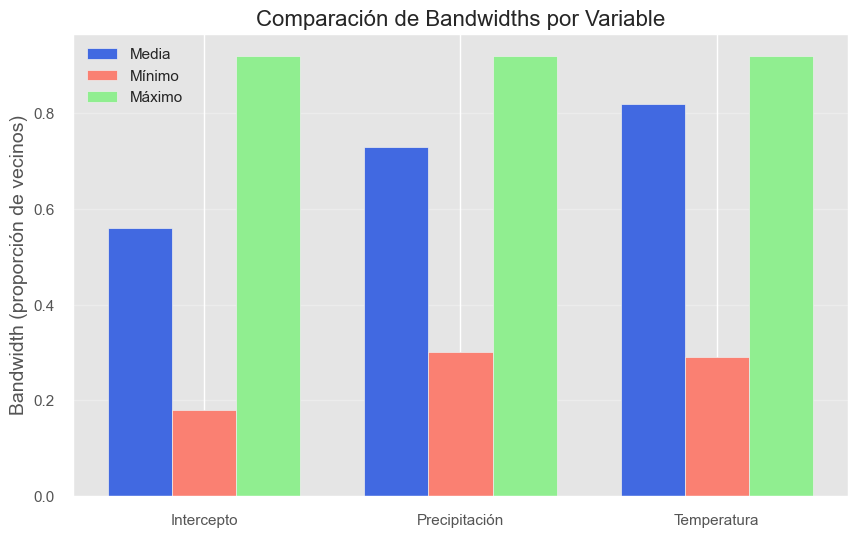

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo basados en tus estadísticas
stats = {
    'Variable': ['Intercepto', 'Precipitación', 'Temperatura'],
    'Media': [0.56, 0.73, 0.82],
    'Mínimo': [0.18, 0.30, 0.29],
    'Máximo': [0.92, 0.92, 0.92]
}

fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(stats['Variable']))
width = 0.25

ax.bar(x - width, stats['Media'], width, label='Media', color='royalblue')
ax.bar(x, stats['Mínimo'], width, label='Mínimo', color='salmon')
ax.bar(x + width, stats['Máximo'], width, label='Máximo', color='lightgreen')

ax.set_ylabel('Bandwidth (proporción de vecinos)')
ax.set_title('Comparación de Bandwidths por Variable')
ax.set_xticks(x)
ax.set_xticklabels(stats['Variable'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.show()

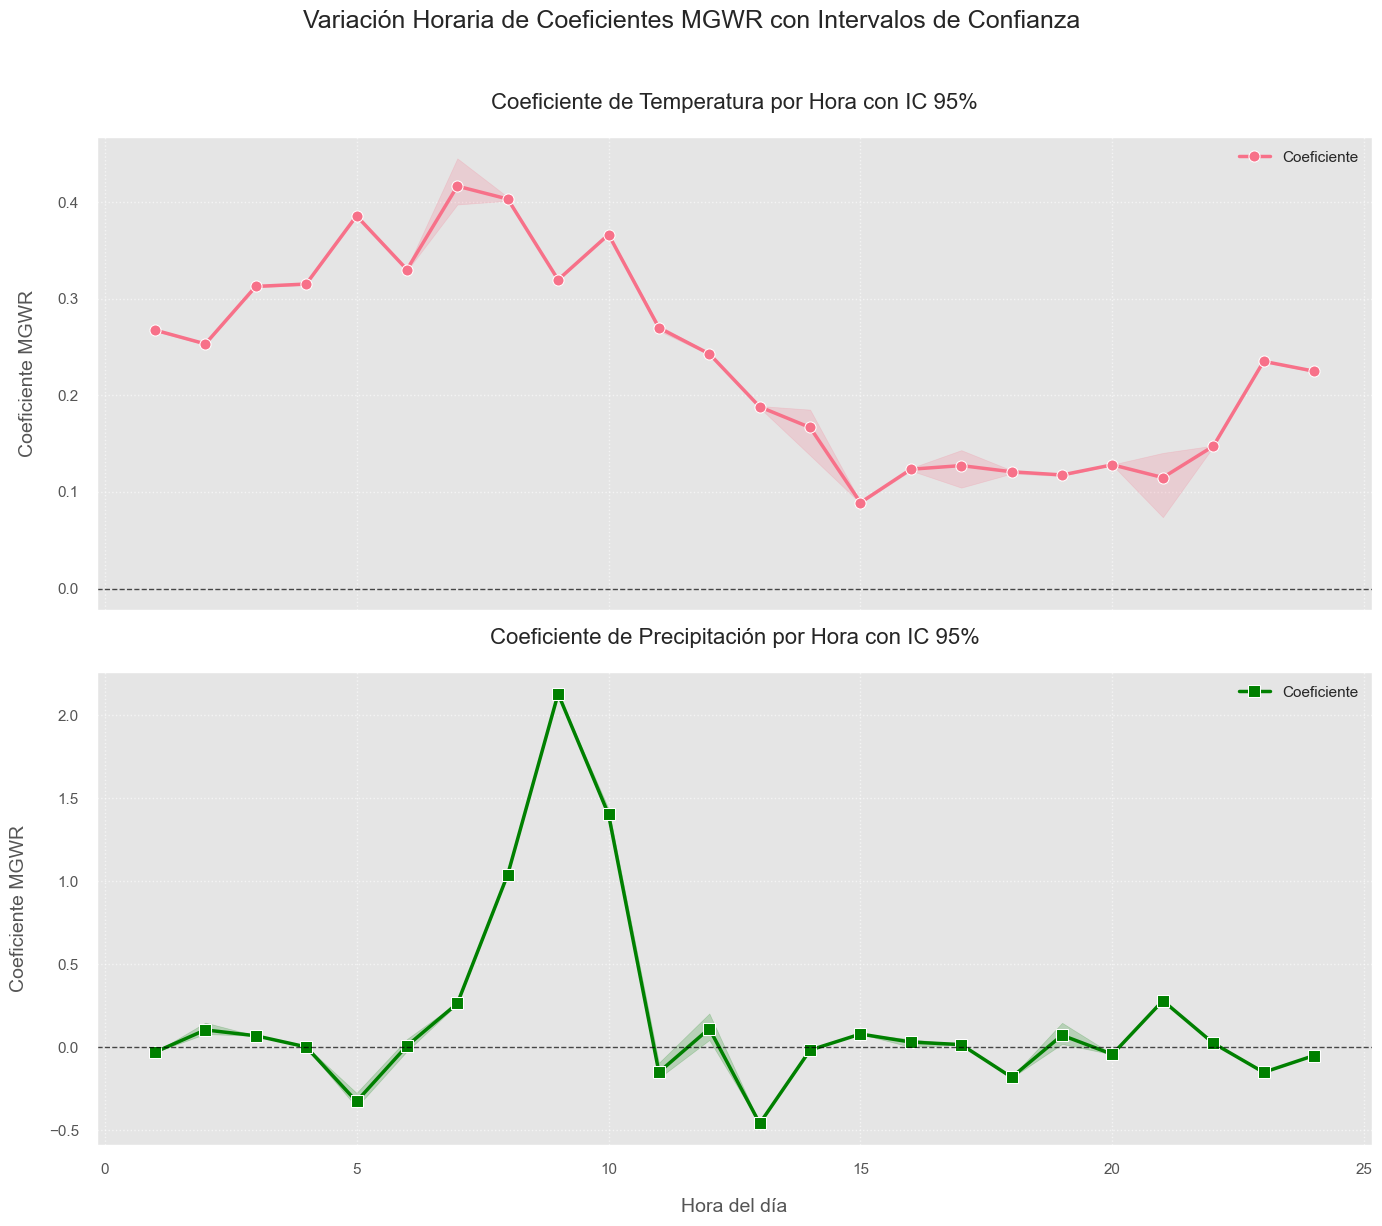


                Estadísticas Detalladas de Coeficientes por Hora                
      temperatura_mean  temperatura_std  temperatura_count  temperatura_<lambda_0>  temperatura_<lambda_1>  pp_horaria_mean  pp_horaria_std  pp_horaria_count  pp_horaria_<lambda_0>  pp_horaria_<lambda_1>
hora                                                                                                                                                                                                       
1                0.268            0.003                 15                   0.265                   0.273           -0.030           0.000                15                 -0.030                 -0.030
2                0.253            0.002                 15                   0.251                   0.258            0.105           0.078                15                  0.067                  0.289
3                0.313            0.003                 15                   0.310                   0

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Configuración de estilos y parámetros visuales
plt.style.use('ggplot')  # Estilo alternativo profesional
sns.set_palette("husl")  # Paleta de colores
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

def graficar_coeficientes(resultados_completos):
    """
    Función para graficar coeficientes de temperatura y precipitación con intervalos de confianza
    
    Parámetros:
    resultados_completos : DataFrame con los resultados del modelo MGWR
    """
    if not isinstance(resultados_completos, pd.DataFrame) or resultados_completos.empty:
        print("Error: El DataFrame de resultados está vacío o no existe")
        return
    
    # Verificar que existan las columnas necesarias
    columnas_requeridas = ['hora', 'temperatura', 'pp_horaria']
    if not all(col in resultados_completos.columns for col in columnas_requeridas):
        print(f"Error: Faltan columnas requeridas. Se necesitan: {columnas_requeridas}")
        return
    
    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
    
    # --- Gráfico de Temperatura ---
    sns.lineplot(
        data=resultados_completos,
        x='hora',
        y='temperatura',
        ax=ax1,
        errorbar=('ci', 95),  # Intervalo de confianza del 95%
        estimator='mean',
        linewidth=2.5,
        marker='o',
        markersize=8,
        label='Coeficiente'
    )
    
    # Personalización del gráfico de temperatura
    ax1.set_title('Coeficiente de Temperatura por Hora con IC 95%', pad=20)
    ax1.set_ylabel('Coeficiente MGWR', labelpad=15)
    ax1.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax1.grid(True, linestyle=':', alpha=0.6)
    
    # --- Gráfico de Precipitación ---
    sns.lineplot(
        data=resultados_completos,
        x='hora',
        y='pp_horaria',
        ax=ax2,
        errorbar=('ci', 95),  # Intervalo de confianza del 95%
        estimator='mean',
        linewidth=2.5,
        marker='s',
        markersize=8,
        color='green',
        label='Coeficiente'
    )
    
    # Personalización del gráfico de precipitación
    ax2.set_title('Coeficiente de Precipitación por Hora con IC 95%', pad=20)
    ax2.set_xlabel('Hora del día', labelpad=15)
    ax2.set_ylabel('Coeficiente MGWR', labelpad=15)
    ax2.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax2.grid(True, linestyle=':', alpha=0.6)
    
    # Ajustes finales
    plt.suptitle('Variación Horaria de Coeficientes MGWR con Intervalos de Confianza', y=1.02, fontsize=18)
    plt.tight_layout()
    plt.show()
    
    # --- Estadísticas detalladas ---
    print("\n" + "="*80)
    print("Estadísticas Detalladas de Coeficientes por Hora".center(80))
    print("="*80)
    
    stats = resultados_completos.groupby('hora')[['temperatura', 'pp_horaria']].agg(
        ['mean', 'std', 'count', lambda x: np.percentile(x, 2.5), lambda x: np.percentile(x, 97.5)]
    )
    
    stats.columns = ['_'.join(col).strip() for col in stats.columns.values]
    stats.rename(columns={
        'Temperatura_<lambda_0>': 'Temperatura_2.5%',
        'Temperatura_<lambda_1>': 'Temperatura_97.5%',
        'Precipitacion_<lambda_0>': 'Precipitacion_2.5%',
        'Precipitacion_<lambda_1>': 'Precipitacion_97.5%'
    }, inplace=True)
    
    print(stats.round(3).to_string())
    
    # Exportar gráficos en alta calidad
    fig.savefig('coeficientes_mgwr.png', dpi=300, bbox_inches='tight')
    print("\nGráficos exportados como 'coeficientes_mgwr.png'")

# Ejecutar la función con tus datos
if 'resultados_completos' in globals():
    graficar_coeficientes(resultados_completos)
else:
    print("No se encontró el DataFrame 'resultados_completos'")

In [152]:
resultados_completos.columns

Index(['Intercepto', 'pp_horaria', 'temperatura', 'hora', 'Codigo',
       'logpm25_obs', 'logpm25_pred', 'pm25_obs', 'pm25_pred', 'PM25_pred'],
      dtype='object')

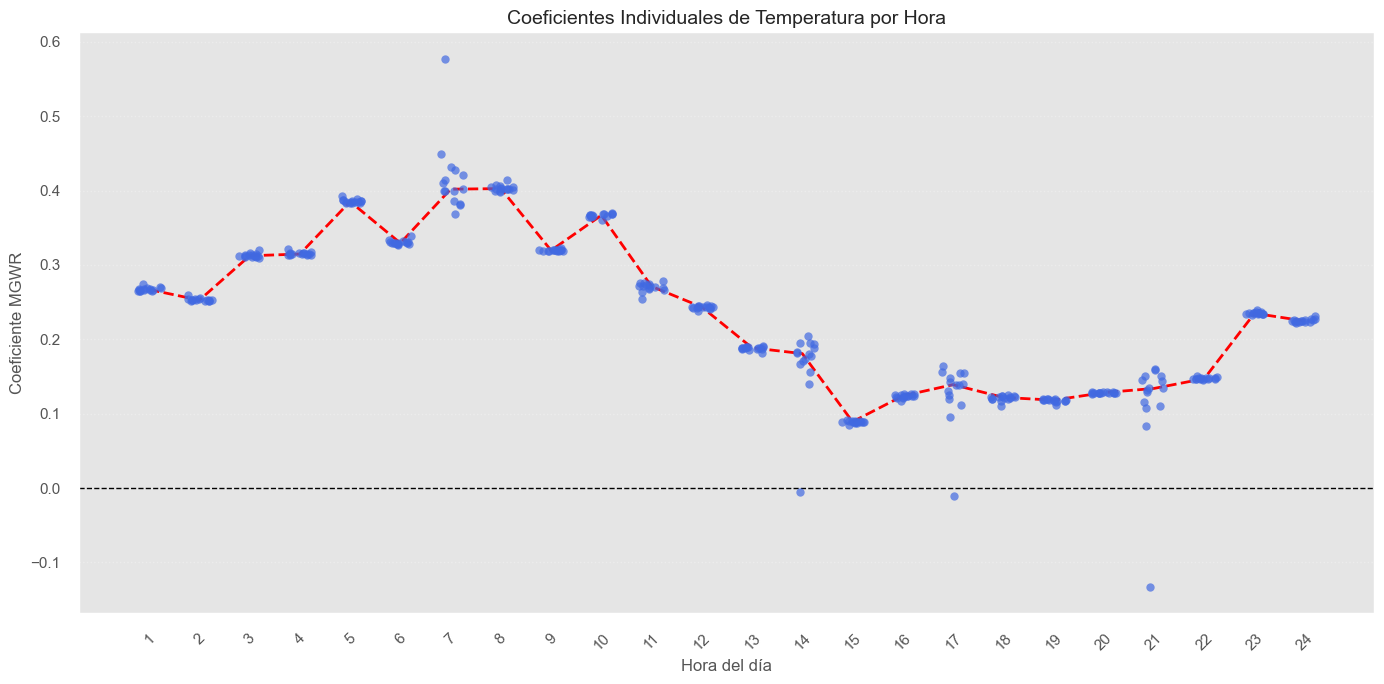

In [158]:
plt.figure(figsize=(14, 7))

# Gráfico de puntos puro
sns.stripplot(
    data=resultados_completos,
    x='hora',
    y='temperatura',
    color='royalblue',
    size=6,
    alpha=0.7,
    jitter=0.25
)

# Línea de mediana
medians = resultados_completos.groupby('hora')['temperatura'].median()
plt.plot(medians.index-1, medians.values, color='red', linewidth=2, linestyle='--')

plt.title('Coeficientes Individuales de Temperatura por Hora', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Coeficiente MGWR', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

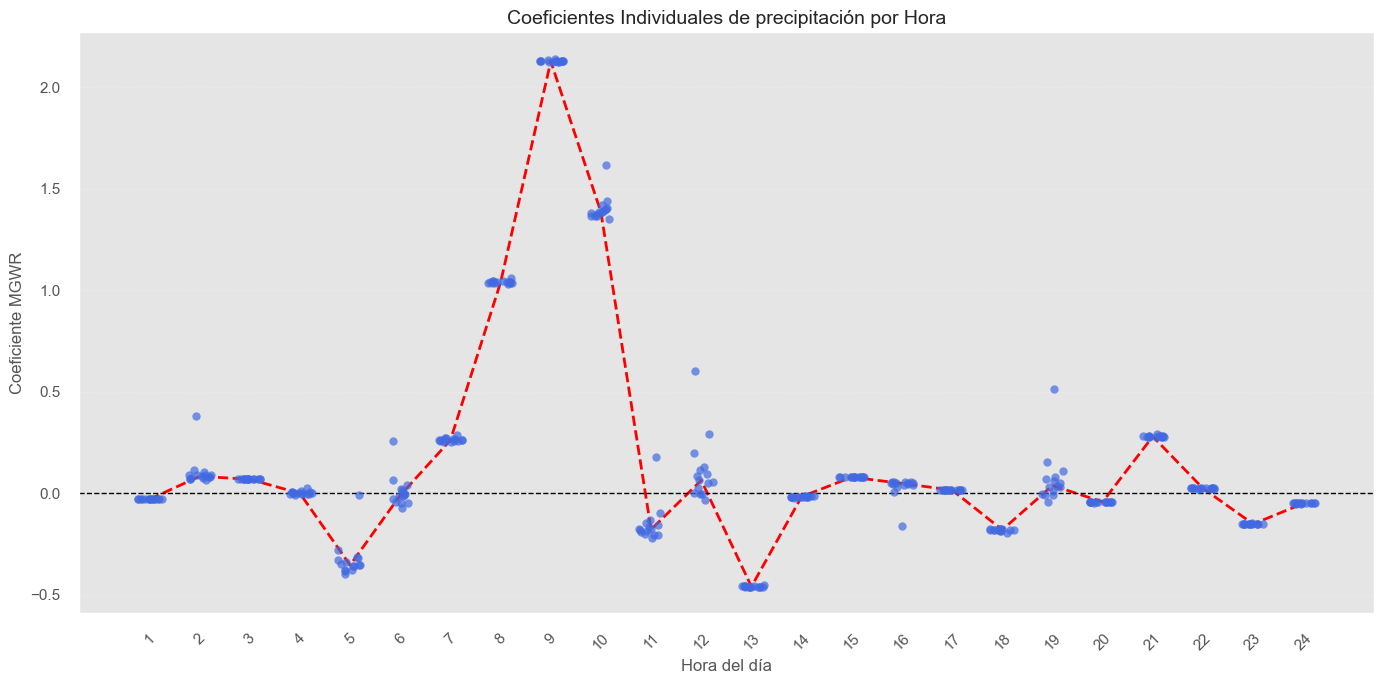

In [160]:
plt.figure(figsize=(14, 7))

# Gráfico de puntos puro
sns.stripplot(
    data=resultados_completos,
    x='hora',
    y='pp_horaria',
    color='royalblue',
    size=6,
    alpha=0.7,
    jitter=0.25
)

# Línea de mediana
medians = resultados_completos.groupby('hora')['pp_horaria'].median()
plt.plot(medians.index-1, medians.values, color='red', linewidth=2, linestyle='--')

plt.title('Coeficientes Individuales de precipitación por Hora', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Coeficiente MGWR', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

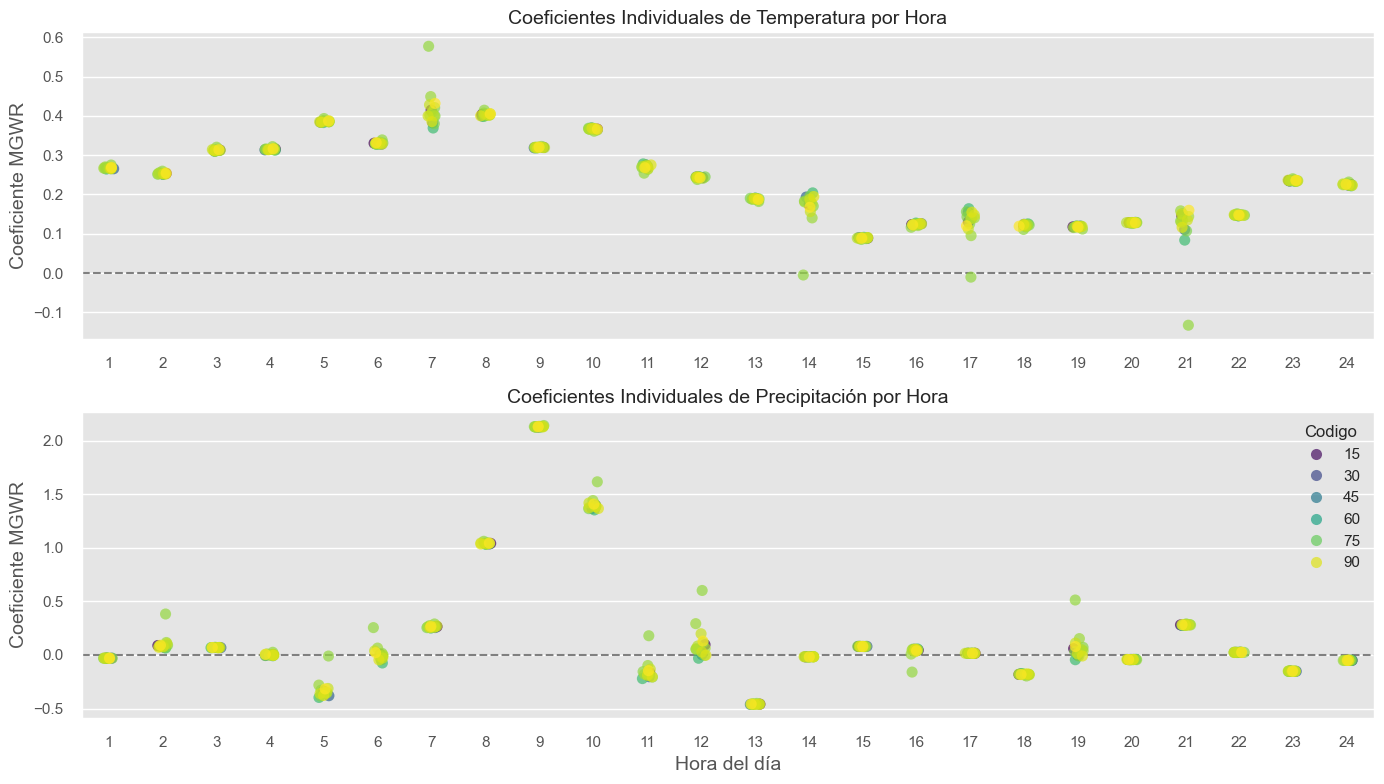


Resumen de coeficientes individuales por hora:
     temperatura                                 pp_horaria                   
           count     min  median     max     std      count     min  median   
hora                                                                          
1             15  0.2646  0.2669  0.2750  0.0025         15 -0.0300 -0.0298  \
2             15  0.2511  0.2527  0.2593  0.0020         15  0.0649  0.0838   
3             15  0.3097  0.3123  0.3203  0.0026         15  0.0681  0.0692   
4             15  0.3128  0.3147  0.3217  0.0022         15 -0.0072 -0.0002   
5             15  0.3830  0.3852  0.3933  0.0025         15 -0.3961 -0.3537   
6             15  0.3273  0.3294  0.3389  0.0029         15 -0.0747 -0.0099   
7             15  0.3691  0.4019  0.5772  0.0493         15  0.2508  0.2620   
8             15  0.3985  0.4026  0.4145  0.0039         15  1.0319  1.0390   
9             15  0.3186  0.3195  0.3223  0.0010         15  2.1249  2.1277   
10  

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_coeficientes_individuales(resultados_completos):
    """
    Gráfico de coeficientes individuales por hora sin promediar
    """
    # Verificar columnas necesarias
    required_cols = ['hora', 'temperatura', 'pp_horaria', 'Codigo']
    if not all(col in resultados_completos.columns for col in required_cols):
        missing = [col for col in required_cols if col not in resultados_completos.columns]
        print(f"Error: Faltan columnas {missing} en los datos")
        return
    
    # Configurar el gráfico
    plt.figure(figsize=(14, 8))
    
    # Gráfico para temperatura
    plt.subplot(2, 1, 1)
    sns.stripplot(
        data=resultados_completos,
        x='hora',
        y='temperatura',
        hue='Codigo',
        jitter=True,
        palette='viridis',
        alpha=0.7,
        size=8
    )
    plt.title('Coeficientes Individuales de Temperatura por Hora', fontsize=14)
    plt.xlabel('')
    plt.ylabel('Coeficiente MGWR')
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend([], [], frameon=False)  # Ocultar leyenda de estaciones
    
    # Gráfico para precipitación
    plt.subplot(2, 1, 2)
    sns.stripplot(
        data=resultados_completos,
        x='hora',
        y='pp_horaria',
        hue='Codigo',
        jitter=True,
        palette='viridis',
        alpha=0.7,
        size=8
    )
    plt.title('Coeficientes Individuales de Precipitación por Hora', fontsize=14)
    plt.xlabel('Hora del día')
    plt.ylabel('Coeficiente MGWR')
    plt.axhline(0, color='gray', linestyle='--')
    
    # Ajustes finales
    plt.tight_layout()
    plt.show()
    
    # Mostrar resumen estadístico
    print("\nResumen de coeficientes individuales por hora:")
    stats = resultados_completos.groupby('hora')[['temperatura', 'pp_horaria']].agg(['count', 'min', 'median', 'max', 'std'])
    print(stats.round(4))

# Ejecutar la función
if 'resultados_completos' in globals():
    plot_coeficientes_individuales(resultados_completos)
else:
    print("No se encontró el DataFrame 'resultados_completos'")

In [142]:
resultados_completos.describe()

Intercepto  pp_horaria  temperatura        hora      Codigo   
count  360.000000  360.000000   360.000000  360.000000  360.000000  \
mean     3.084591    0.176291     0.236204   12.500000   75.333333   
std      0.594223    0.559839     0.103560    6.931821   21.086901   
min      2.296779   -0.461199    -0.132939    1.000000   12.000000   
25%      2.653444   -0.047709     0.134687    6.750000   78.000000   
50%      3.025270    0.016147     0.239019   12.500000   82.000000   
75%      3.141656    0.090939     0.318769   18.250000   87.000000   
max      5.026460    2.140221     0.577209   24.000000   94.000000   

       logpm25_obs  logpm25_pred    pm25_obs   pm25_pred   PM25_pred  
count   360.000000    360.000000  360.000000  360.000000  360.000000  
mean      2.892124      2.899733   18.824877   18.623307   18.623307  
std       0.289608      0.221646    5.833958    4.242982    4.242982  
min       2.149670      2.273563    8.582027    9.713950    9.713950  
25%       2.711092      2.770108   15.045705   15.960355   15.960355  
50%       2.868911      2.888589   17.617816   17.967942   17.967942  
75%       3.056880      3.027880   21.261134   20.653410   20.653410  
max       3.802832      3.662683   44.827965   38.965762   38.965762

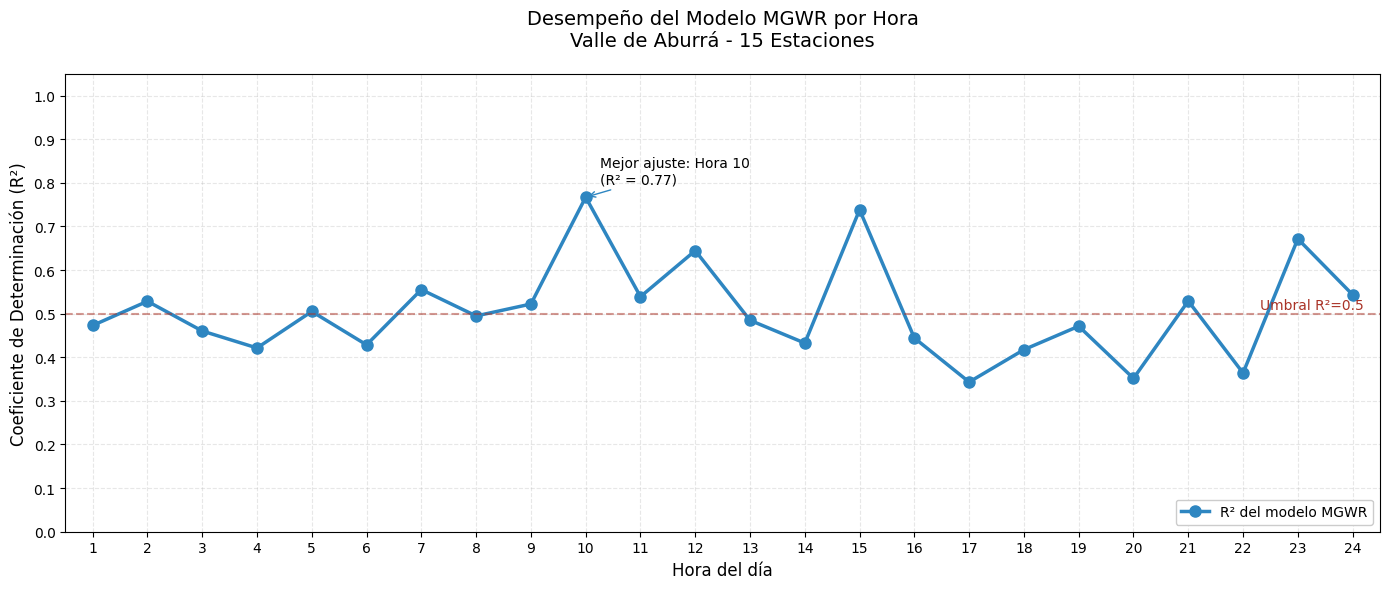

In [90]:
# 6. Procesamiento de resultados y gráfica del R²
# ----------------------------------------------
if resultados_mgwr:
    resultados_completos = pd.concat(resultados_mgwr, ignore_index=True)
    df_metricas = pd.DataFrame(metricas_horarias)
    
    # Crear figura
    plt.figure(figsize=(14, 6))
    
    # Gráfica del R²
    plt.plot(df_metricas['hora'], df_metricas['R2'], 
             'o-', color='#2e86c1', linewidth=2.5, markersize=8,
             label='R² del modelo MGWR')
    
    # Personalización
    plt.title('Desempeño del Modelo MGWR por Hora\nValle de Aburrá - 15 Estaciones', 
              fontsize=14, pad=20)
    plt.xlabel('Hora del día', fontsize=12)
    plt.ylabel('Coeficiente de Determinación (R²)', fontsize=12)
    plt.xticks(range(1, 25))  # Todas las horas
    plt.yticks(np.arange(0, 1.1, 0.1))  # Rango completo para R²
    
    # Línea horizontal en R²=0.5 como referencia
    plt.axhline(y=0.5, color='#a93226', linestyle='--', alpha=0.5)
    plt.text(24.2, 0.51, 'Umbral R²=0.5', color='#a93226', ha='right')
    
    # Resaltar el mejor R²
    max_r2_idx = df_metricas['R2'].idxmax()
    plt.annotate(f'Mejor ajuste: Hora {int(df_metricas.loc[max_r2_idx, "hora"])}\n(R² = {df_metricas.loc[max_r2_idx, "R2"]:.2f})',
                 xy=(df_metricas.loc[max_r2_idx, 'hora'], df_metricas.loc[max_r2_idx, 'R2']),
                 xytext=(10, 10), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", color='#2e86c1'))
    
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.ylim(0, 1.05)  # Rango fijo para R²
    plt.xlim(0.5, 24.5)  # Rango completo de horas
    
    # Solo mostrar la leyenda del R²
    plt.legend(loc='lower right', framealpha=1)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No se pudo ajustar ningún modelo. Revisa los datos de entrada.")

In [134]:
estaciones

Codigo                                           Estacion  Longitud   
0        6  Politecnico Colombiano Jaime Isaza Cadavid - M... -75.57777  \
1       12                            Estación Tráfico Centro -75.56958   
2       28                   Itagüí - Casa de Justicia Itagüí -75.59721   
3       37                       Universidad San Buenaventura -75.56867   
4       38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   
5       40                                Parque de las Aguas -75.41949   
6       41                            Universidad de Medellin -75.60996   
7       43                                  Tanque Miraflores -75.54919   
8       46                       Exito San Antonio - Medellin -75.56747   
9       69                   Caldas - E U Joaquín Aristizabal -75.63776   
10      78                             La Estrella - Hospital -75.64417   
11      79     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060   
12      80  Medellín, Villahermosa - Planta de producción ... -75.54826   
13      81                             Barbosa - Torre Social -75.33040   
14      82           Copacabana - Ciudadela Educativa La Vida -75.50475   
15      83           Medellin, Belén - I.E Pedro Justo Berrio -75.61047   
16      84  Medellín, El Poblado - I.E INEM sede Santa Cat... -75.56095   
17      85  Medellín, San Cristobal - Parque Biblioteca Fe... -75.63643   
18      86               Medellín, Aranjuez - I.E Ciro Mendia -75.55552   
19      87                        Bello - I.E. Fernando Vélez -75.56780   
20      88                  Envigado - E.S.E. Santa Gertrudis -75.58197   
21      90                    Sabaneta - I.E. Rafael J. Mejía -75.62126   
22      92             Itagüí - Estación de Policía Los Gómez -75.61061   
23      94                             Medellín - Santa Elena -75.49847   
24     100           Medellín - Fiscalía General de la Nación -75.57371   
25     101                            Girardota - Tanques EPM -75.44831   
26     103  Estación Parque Biblioteca Tomás Carrasquilla ... -75.58305   
27     104                       Medellín Almacén General EPM -75.58605   
28     106     Medellín - Universidad CES - Barrio el Poblado -75.55185   
29     107    La Estrella - La Tablaza I.E Jose Antonio Galan -75.63194   

    Latitud       Ciudad                   geometry  
0   6.20897     Medellin  POINT (-75.57777 6.20897)  
1   6.25256     Medellin  POINT (-75.56958 6.25256)  
2   6.18567     Medellin  POINT (-75.59721 6.18567)  
3   6.33070        Bello  POINT (-75.56867 6.33070)  
4   6.16850       Itagüí  POINT (-75.64436 6.16850)  
5   6.40671      Barbosa  POINT (-75.41949 6.40671)  
6   6.23018     Medellin  POINT (-75.60996 6.23018)  
7   6.22997     Medellin  POINT (-75.54919 6.22997)  
8   6.24659     Medellin  POINT (-75.56747 6.24659)  
9   6.09308       Caldas  POINT (-75.63776 6.09308)  
10  6.15553  La Estrella  POINT (-75.64417 6.15553)  
11  6.22189     Medellin  POINT (-75.61060 6.22189)  
12  6.25891     Medellin  POINT (-75.54826 6.25891)  
13  6.43696      Barbosa  POINT (-75.33040 6.43696)  
14  6.34536   Copacabana  POINT (-75.50475 6.34536)  
15  6.23723     Medellin  POINT (-75.61047 6.23723)  
16  6.19987     Medellin  POINT (-75.56095 6.19987)  
17  6.27785     Medellin  POINT (-75.63643 6.27785)  
18  6.29048     Medellin  POINT (-75.55552 6.29048)  
19  6.33755        Bello  POINT (-75.56780 6.33755)  
20  6.16868     Envigado  POINT (-75.58197 6.16868)  
21  6.14550     Sabaneta  POINT (-75.62126 6.14550)  
22  6.18989       Itagüí  POINT (-75.61061 6.18989)  
23  6.23636     Medellín  POINT (-75.49847 6.23636)  
24  6.26879     Medellín  POINT (-75.57371 6.26879)  
25  6.37325    Girardota  POINT (-75.44831 6.37325)  
26  6.28500     Medellín  POINT (-75.58305 6.28500)  
27  6.22978     Medellín  POINT (-75.58605 6.22978)  
28  6.20739     Medellín  POINT (-75.55185 6.20739)  
29  6.11806  La Estrella  POINT (-75.63194 6.11806)

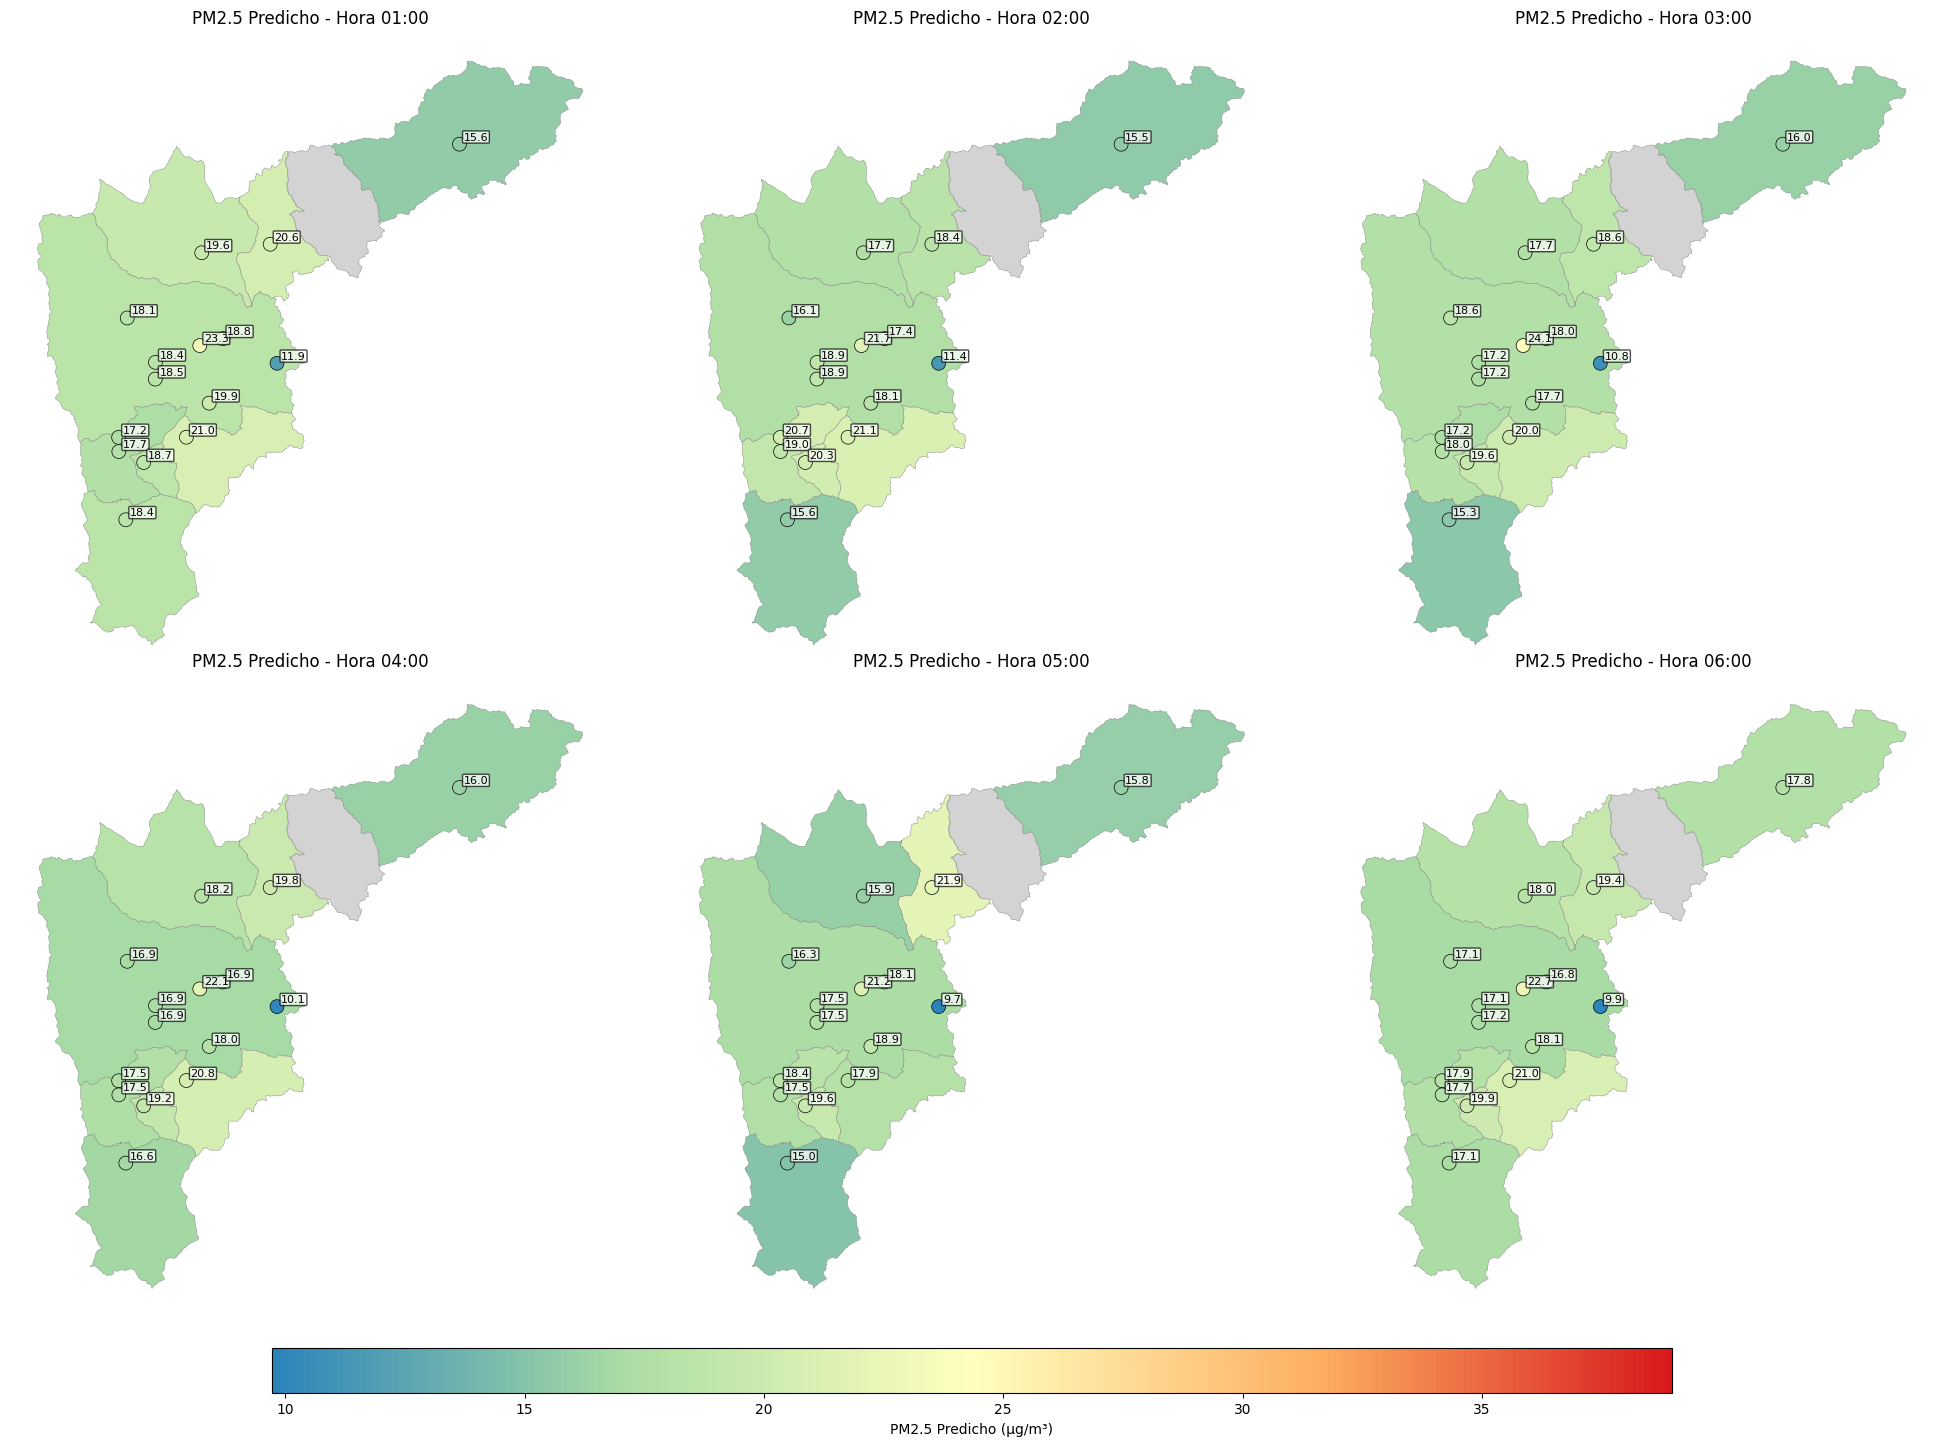

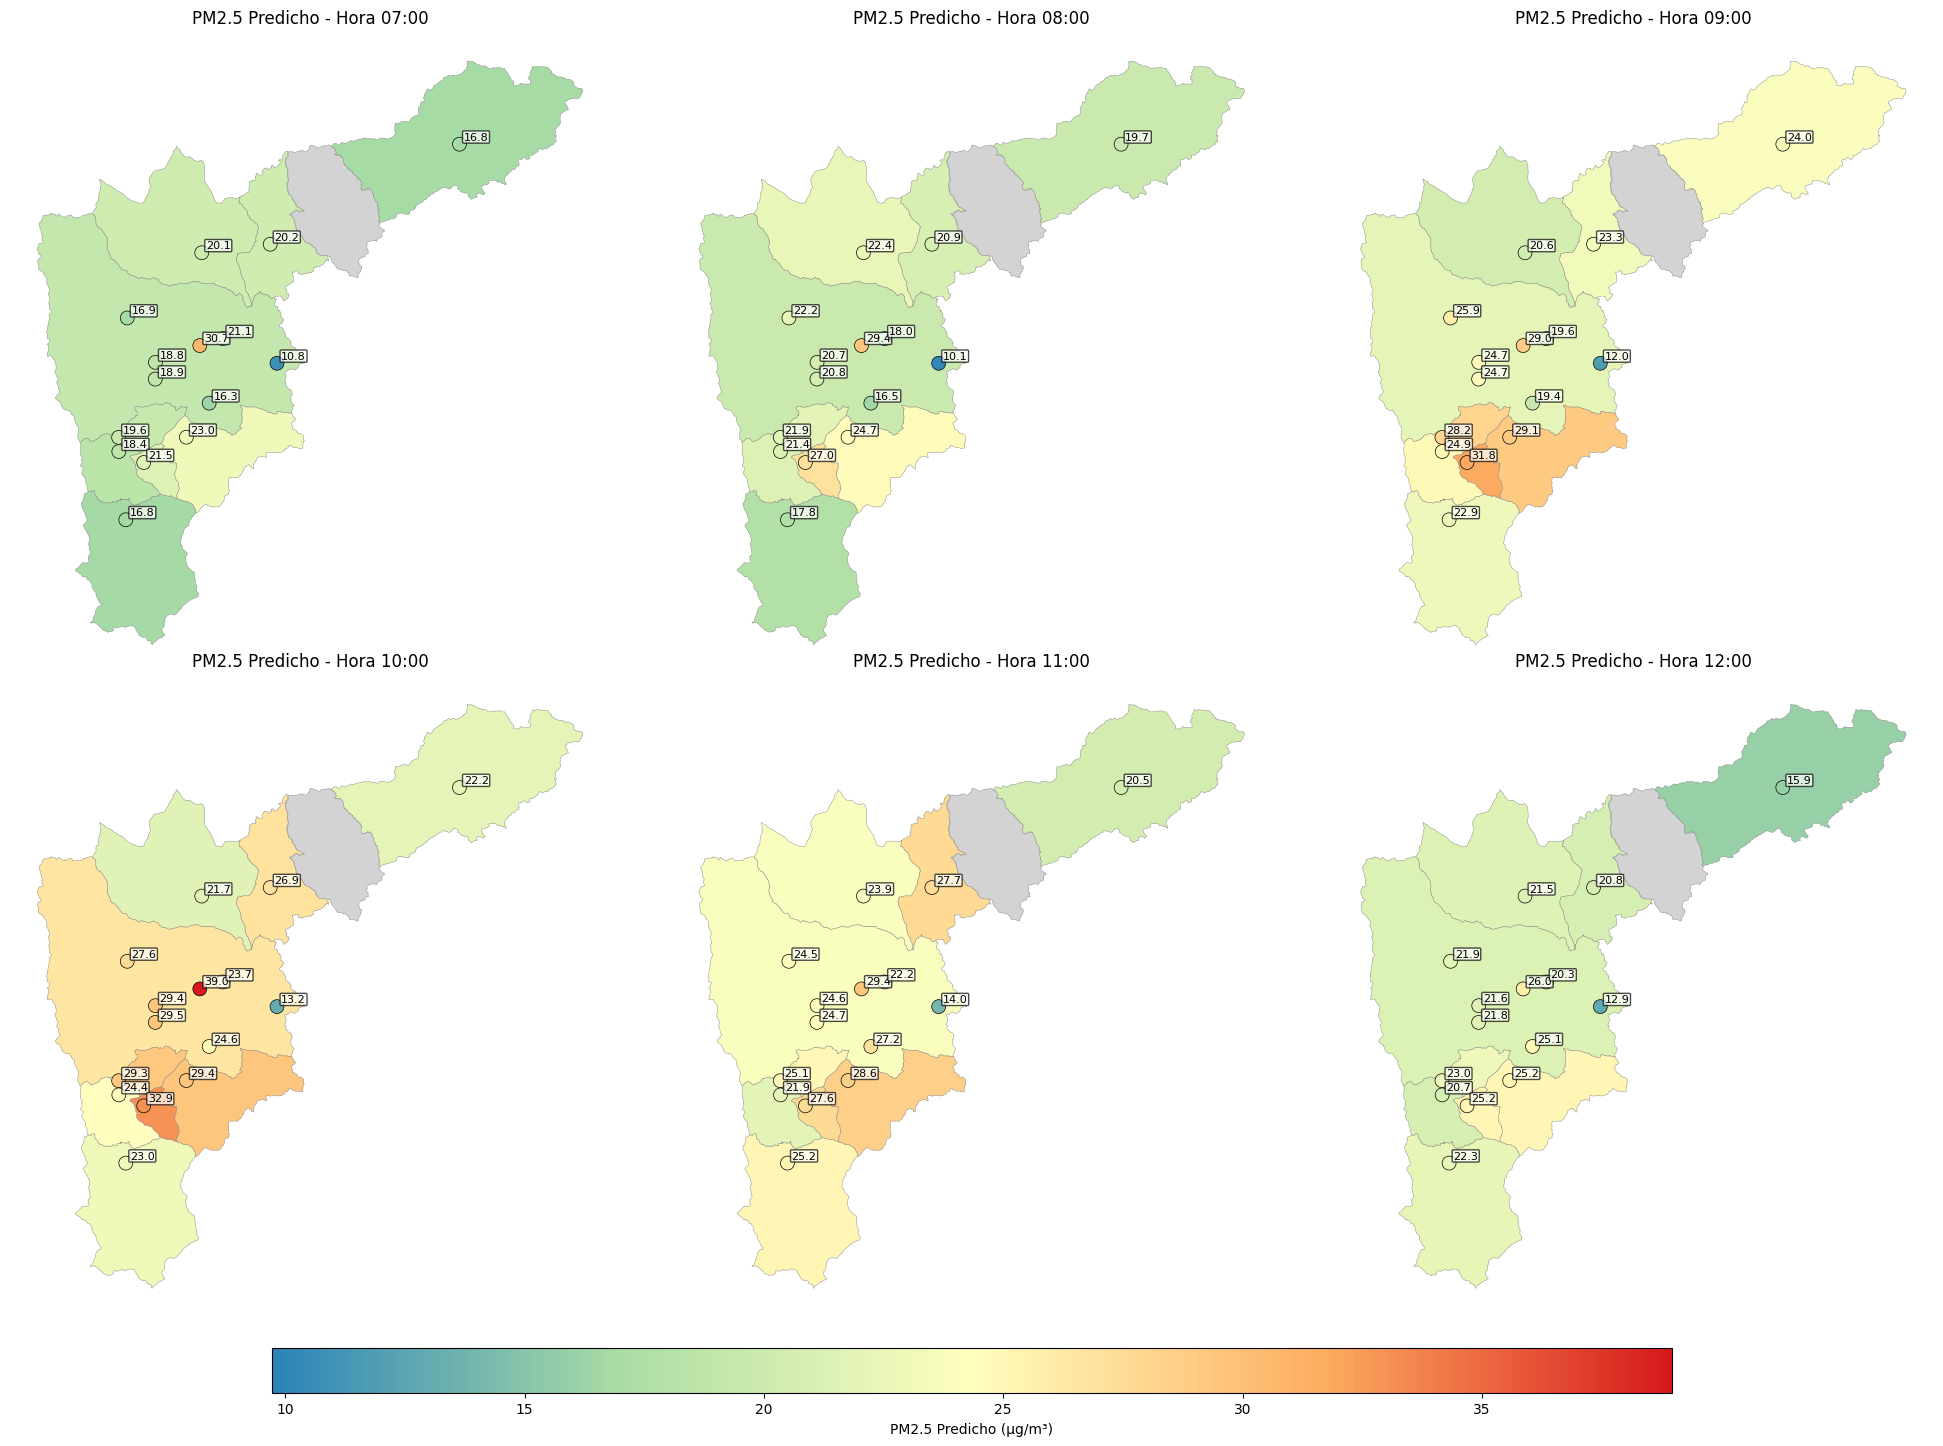

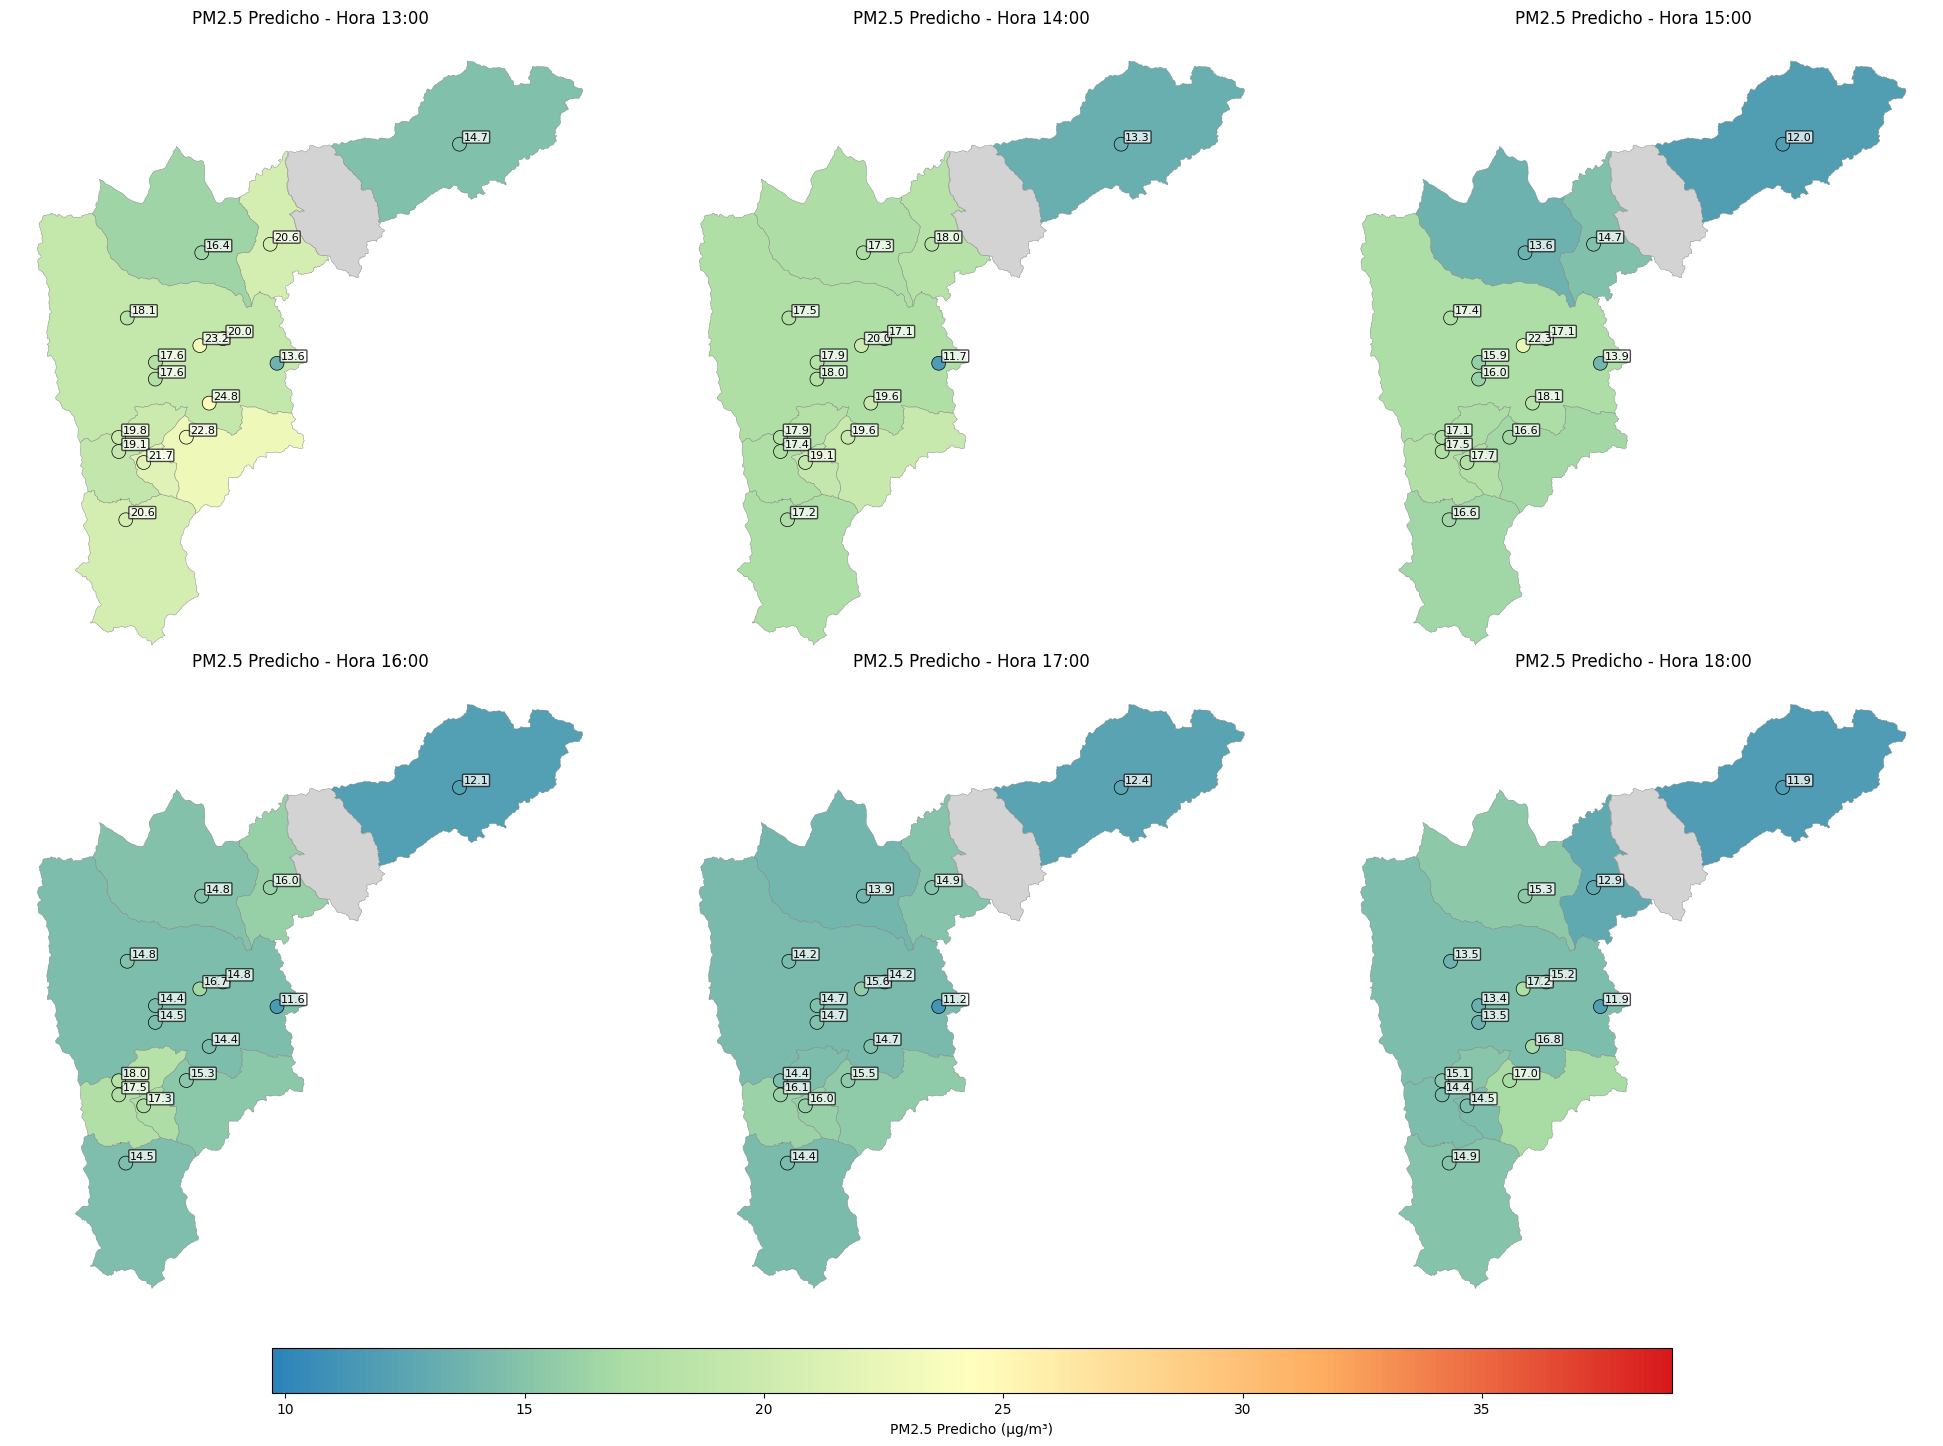

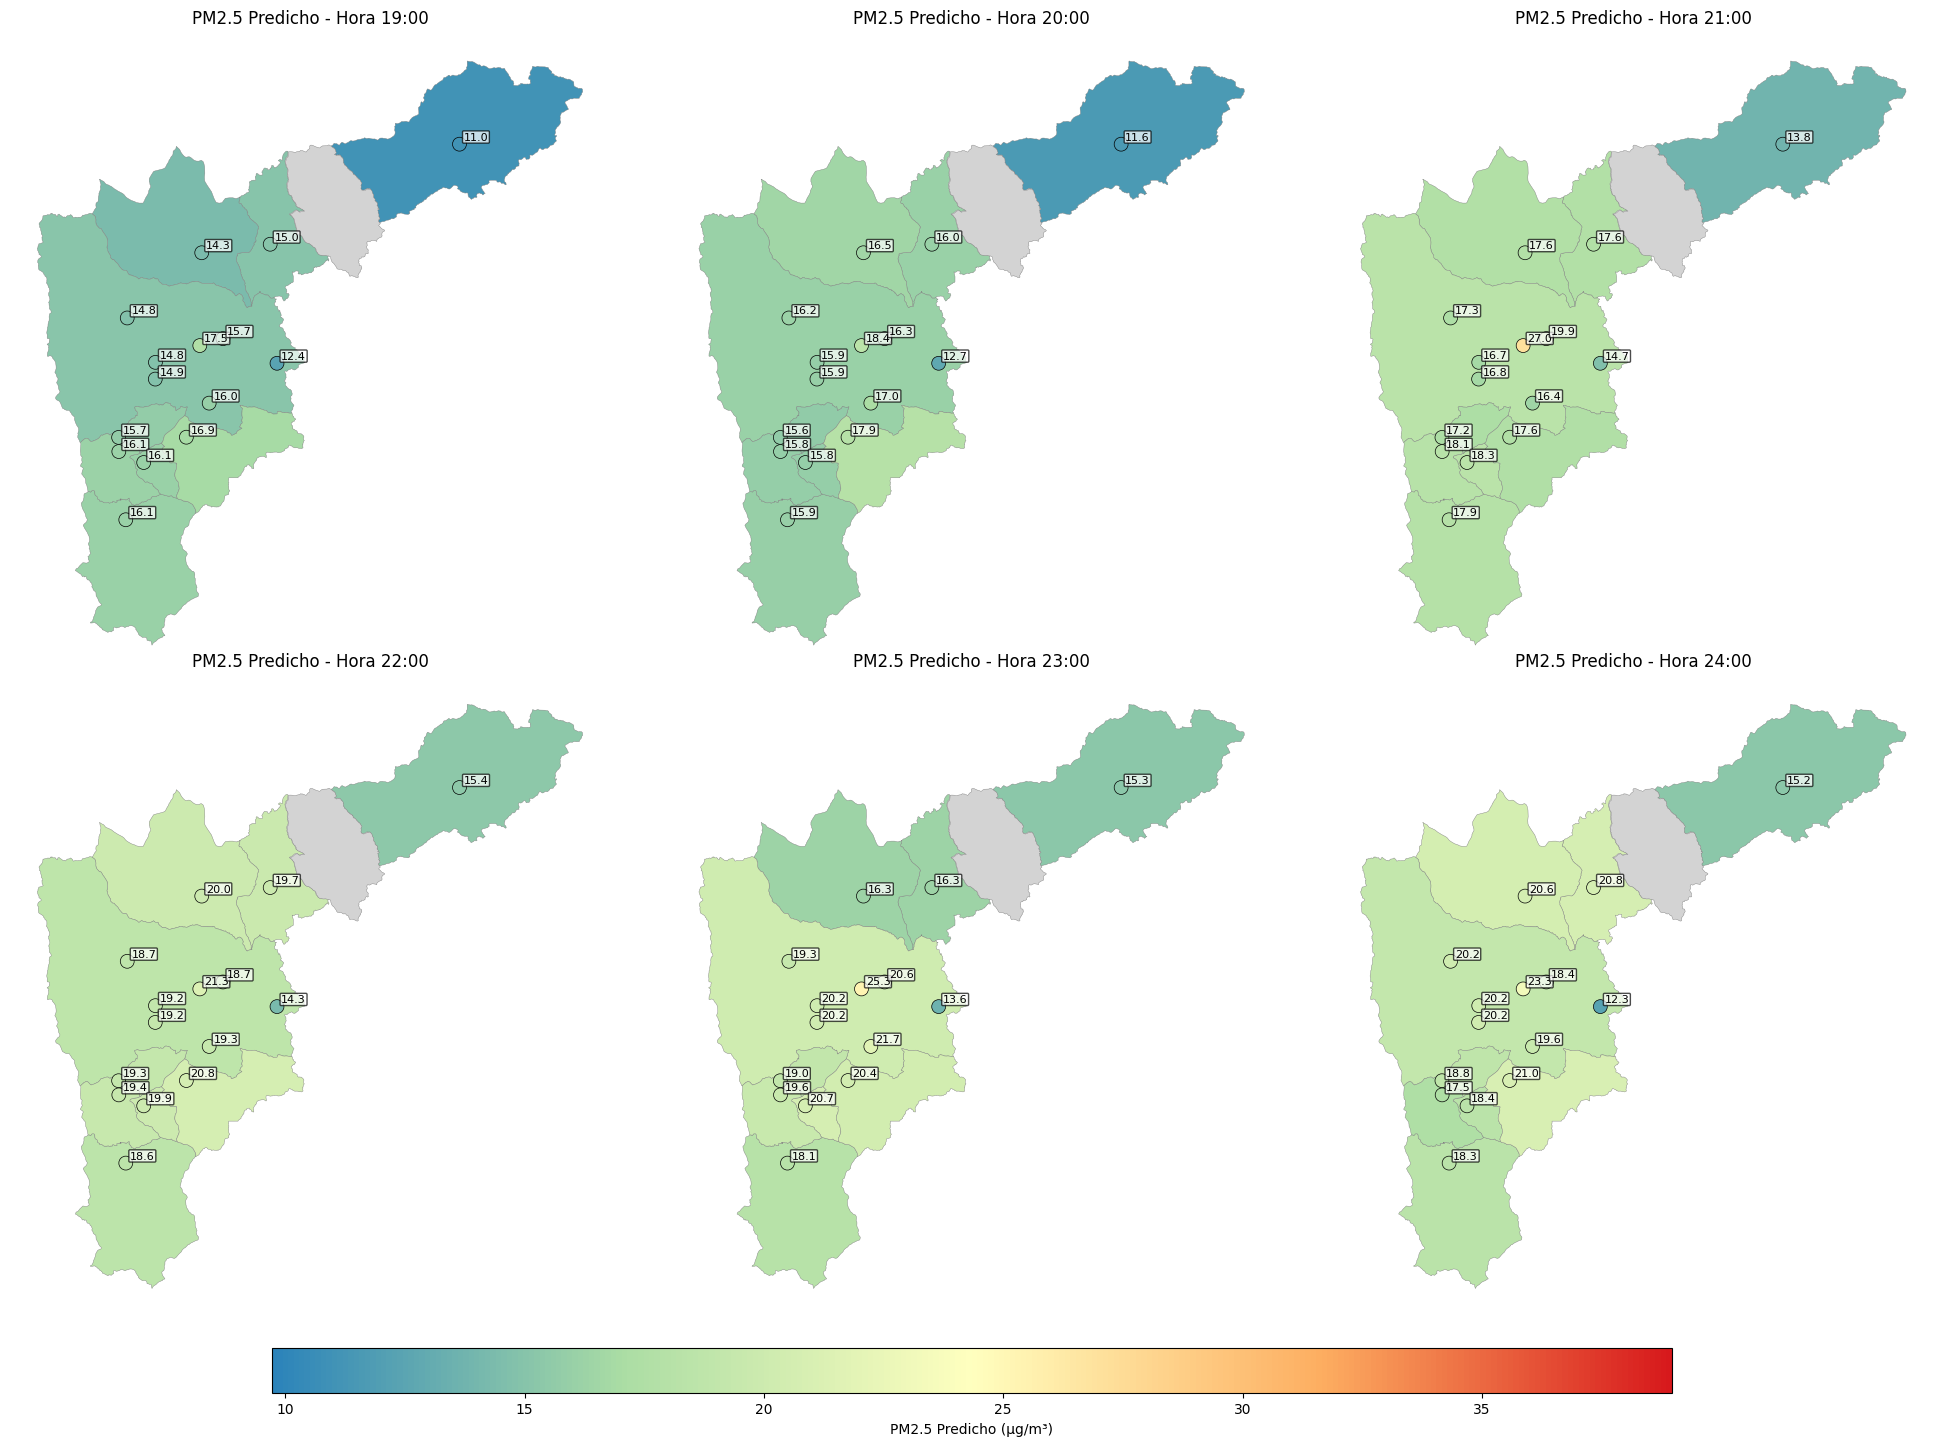

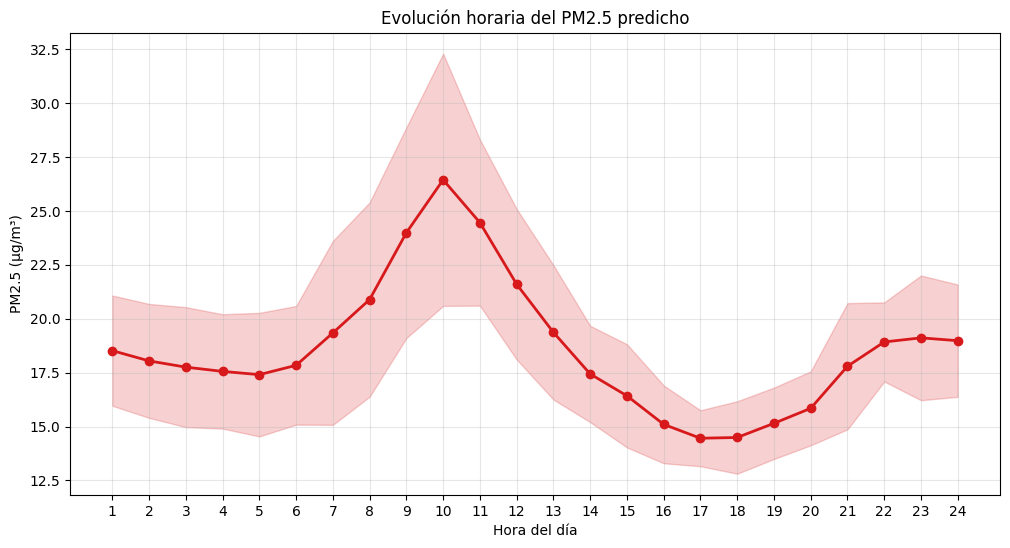

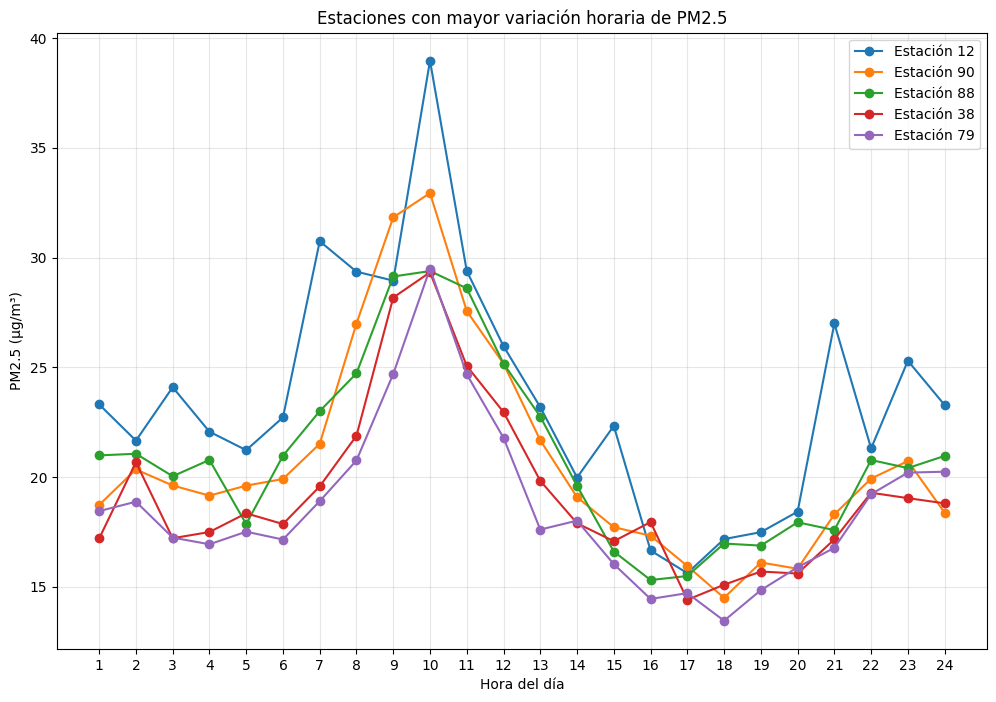

In [141]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap

# 1. Preparación de los datos geoespaciales
# -----------------------------------------

# Convertir resultados_completos a GeoDataFrame (asumiendo que estaciones tiene geometrías)
gdf_resultados = gpd.GeoDataFrame(
    resultados_completos.merge(
        estaciones[['Codigo', 'geometry']],
        on='Codigo',
        how='left'
    ),
    geometry='geometry'
)

# Asegurarse que los CRS coincidan
gdf_resultados = gdf_resultados.to_crs(municipios.crs)

# 2. Configuración visual común
# -----------------------------
cmap = LinearSegmentedColormap.from_list(
    'pm25_cmap', 
    ['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'],
    N=256
)

vmin = gdf_resultados['pm25_pred'].min()
vmax = gdf_resultados['pm25_pred'].max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# 3. Función principal con spatial join
# -------------------------------------
def plot_predicciones_pm25(hora, ax, municipios):
    """Función para plotear predicciones de PM2.5 por hora con spatial join"""
    
    # Filtrar datos para la hora específica
    datos_hora = gdf_resultados[gdf_resultados['hora'] == hora].copy()
    
    if datos_hora.empty:
        ax.set_title(f'No hay datos para la hora {hora:02d}:00')
        ax.set_axis_off()
        return
    
    # Realizar el spatial join entre estaciones y municipios
    datos_con_municipios = gpd.sjoin(
        datos_hora, 
        municipios[['COD_MPIO', 'MPIO_NOMBR', 'geometry']],
        how='left',
        predicate='within'
    )
    
    # Calcular promedio por municipio
    pm25_por_municipio = datos_con_municipios.groupby('COD_MPIO')['pm25_pred'].mean().reset_index()
    
    # Unir con los polígonos de municipios
    municipios_pm25 = municipios.merge(
        pm25_por_municipio,
        on='COD_MPIO',
        how='left'
    )
    
    # Plotear municipios coloreados
    municipios_pm25.plot(
        column='pm25_pred',
        cmap=cmap,
        norm=norm,
        ax=ax,
        edgecolor='gray',
        linewidth=0.3,
        legend=False,
        missing_kwds={'color': 'lightgrey'}
    )
    
    # Añadir estaciones como puntos
    datos_hora.plot(
        column='pm25_pred',
        cmap=cmap,
        norm=norm,
        ax=ax,
        markersize=100,
        edgecolor='black',
        linewidth=0.5,
        legend=False
    )
    
    # Etiquetas con valores
    for idx, row in datos_hora.iterrows():
        ax.annotate(
            text=f"{row['pm25_pred']:.1f}",
            xy=(row.geometry.x, row.geometry.y),
            xytext=(3, 3),
            textcoords="offset points",
            fontsize=8,
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.7)
        )
    
    ax.set_title(f'PM2.5 Predicho - Hora {hora:02d}:00', fontsize=12)
    ax.set_axis_off()

# 4. Generación de los mapas
# --------------------------
n_horas = 24
n_figuras = (n_horas + 5) // 6  # 6 horas por figura

for fig_num in range(n_figuras):
    horas_a_plotear = range(fig_num*6 + 1, min((fig_num+1)*6 + 1, n_horas + 1))
    
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(2, 3)
    axes = [fig.add_subplot(gs[i]) for i in range(6)]
    
    # Espacio para la barra de color
    cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.03])
    
    # Dibujar cada mapa
    for i, hora in enumerate(horas_a_plotear):
        plot_predicciones_pm25(hora=hora, ax=axes[i], municipios=municipios)
    
    # Barra de color común
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='PM2.5 Predicho (µg/m³)')
    
    plt.tight_layout(rect=[0, 0.12, 1, 1])
    plt.show()

# 5. Análisis temporales (opcional)
# ---------------------------------
# Evolución horaria promedio
pm25_pred_hora = gdf_resultados.groupby('hora')['pm25_pred'].agg(['mean', 'std'])
plt.figure(figsize=(12, 6))
plt.plot(pm25_pred_hora.index, pm25_pred_hora['mean'], 
         marker='o', color='#d7191c', linewidth=2)
plt.fill_between(pm25_pred_hora.index,
                 pm25_pred_hora['mean'] - pm25_pred_hora['std'],
                 pm25_pred_hora['mean'] + pm25_pred_hora['std'],
                 alpha=0.2, color='#d7191c')
plt.title('Evolución horaria del PM2.5 predicho')
plt.xlabel('Hora del día')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(1, 25))
plt.grid(True, alpha=0.3)
plt.show()

# Top estaciones con mayor variación
top_estaciones = gdf_resultados.groupby('Codigo')['pm25_pred'].std().nlargest(5).index

plt.figure(figsize=(12, 8))
for est in top_estaciones:
    datos_est = gdf_resultados[gdf_resultados['Codigo'] == est]
    plt.plot(datos_est['hora'], datos_est['pm25_pred'], 
             marker='o', label=f"Estación {est}")

plt.title('Estaciones con mayor variación horaria de PM2.5')
plt.xlabel('Hora del día')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(1, 25))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()